<a href="https://colab.research.google.com/github/FranciscoMoralesActuary/An-lisis-de-Regresi-n-Tarea-No-3/blob/main/Proyecto_Final_Equipo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#**Integrantes del equipo**
---

| Integrantes   | No. de cuenta    |
|----------|------|
| Bohórquez Nuño Ana Elizabeth        | 422101862     |
| Cervantes Vasconcelos María Fernanda| 318711827    |
| Hernandez Vargas Hector | 422020053|
| Lugo Salazar María Inés     | 422088480 |
|Morales Ramirez Angel Francisco |422093653|
| Tienda Tienda Sebastian | 319035090 |
|Zuñiga Galván Diego Antonio | 422106104 |

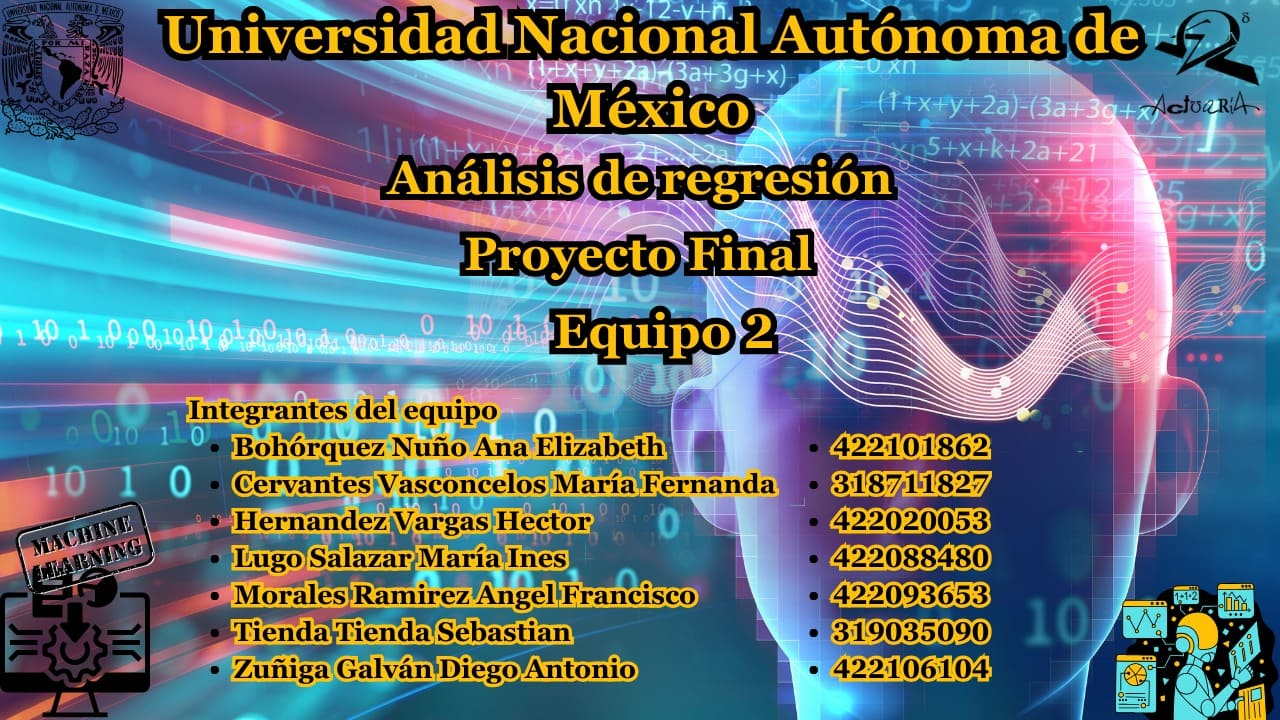

---
# **Instrucciones**
---

###################################################
#### Rúbrica Trabajo Final, Presentación dejan Modelo Analítico  #####
###################################################

Para la realización de esta actividad es necesario entregar por equipo un archivo en Colab y un archivo de Presentaciones de google o una presentación de Colab.

Tomarán los datos de la tarea tres para realizar un análisis comparativo de su modelo de Regresión Líneal contra al menos tres modelos de machine learning revisados en clase. Deberán entregar su análisis y procedimientos con el mayor detalle y cuidado en la explicación para facilitar su lectura, interpretación y discusión.

Se entrega a más tardar el Lunes 04 de Junio de 2024, antes de las 12:00pm (12 horas), se envía en mensaje privado por gmail al profesor compartiendo su documento de presentaciones de google y su colab. No se deben compartir documentos por este medio para esta actividad.

Rúbrica
La calificación máxima será de 10 tomando en cuenta lo siguiente.

0. El trabajo se realiza respetando los equipos ya formados
1. Entregar documento no mayor a 7 hojas/slides con las ideas más importantes del desarrollo del modelo y conclusiones
2. Entregar documento Colab con el procedimiento del desarrollo del modelo
2.1 El desarrollo del modelo primordialmente será sobre los datos de la tarea 3 (Regresión Logística)
2.2 Se recomienda utilizar una técnica de modelación de Regresión Logística, o Árboles de Decisión, Support Vector Machine, Gradient Boosting, o Redes Neuronales.
2.3 Se debe incluir un apartado de interpretación de resultados y una recomendación de como se debe utilizar el modelo.
2.4 El uso de apoyos gráficos deberá ser utilizando un formato diferente al arrojado por default de Python
3. La defensa del trabajo final se hará por turnos por lo que se les darán 20 minutos a cada equipo y se sortearán la participación de los equipos.
4. Cada integrante del equipo debe tener una participación es decir al menos debe ser responsable de explicar una diapositiva
5. Se dejarán 5 minutos para una ronda de preguntas aleatorias en donde primordialmente se cuestionarán a os integrantes que no participaron en la presentación sin opción de tener apoyo de los compañeros del equipo
6. El rol de presentación de los equipos se definirá en un mensaje previo en este canal, los alumnos que previo aviso estén en remoto (solo 1 integrante por equipo) deberán tener su camara encendida dado que se simulará un ambiente profesional de la vida real.

Nota: En la presentación de la primer clase se encuentran lineamientos adicionales de los criterios de evaluación.

Se les pide ser puntuales a los participantes del equipo para poder cumplir con los tiempos definidos.

Saludos

---
#**EDA (Análisis Exploratorio de Datos)**
---

In [1]:
!pip install catboost

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [3]:
#Ponemos la dirrección del repositorio con los datos
url_datos = ('https://raw.githubusercontent.com/FranciscoMoralesActuary/An-lisis-de-Regresi-n-Tarea-No-3/main/car_insurance_claim.csv')
#Leemos el archivo con la función de Pandas pd.read
df = pd.read_csv(url_datos)

---
##**Descripción de datos**
---

In [4]:
#Mostramos los datos
df.head()

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0  16MAR39  60.0         0  11.0  $67,349      No   
1  132761049         0  21JAN56  43.0         0  11.0  $91,449      No   
2  921317019         0  18NOV51  48.0         0  11.0  $52,881      No   
3  727598473         0  05MAR64  35.0         1  10.0  $16,039      No   
4  450221861         0  05JUN48  51.0         0  14.0      NaN      No   

   HOME_VAL MSTATUS  ... CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED MVR_PTS  \
0        $0    z_No  ...  Minivan     yes   $4,461         2      No       3   
1  $257,252    z_No  ...  Minivan     yes       $0         0      No       0   
2        $0    z_No  ...      Van     yes       $0         0      No       2   
3  $124,191     Yes  ...    z_SUV      no  $38,690         2      No       3   
4  $306,251     Yes  ...  Minivan     yes       $0         0      No       0   

   CLM_AMT CAR_AGE CLAIM_FLAG           URBANICITY  
0       $0    18.0          0  Highly Urban/ Urban  
1       $0     1.0          0  Highly Urban/ Urban  
2       $0    10.0          0  Highly Urban/ Urban  
3       $0    10.0          0  Highly Urban/ Urban  
4       $0     6.0          0  Highly Urban/ Urban  

[5 rows x 27 columns]

In [5]:
df.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [6]:
#Verificamos las dimensiones de los datos
df.shape

(10302, 27)

In [7]:
#Observamos la cantidad de registros nulos que hay en el DataFrame
df.isnull().mean()*100


ID            0.000000
KIDSDRIV      0.000000
BIRTH         0.000000
AGE           0.067948
HOMEKIDS      0.000000
YOJ           5.319355
INCOME        5.532906
PARENT1       0.000000
HOME_VAL      5.581440
MSTATUS       0.000000
GENDER        0.000000
EDUCATION     0.000000
OCCUPATION    6.455057
TRAVTIME      0.000000
CAR_USE       0.000000
BLUEBOOK      0.000000
TIF           0.000000
CAR_TYPE      0.000000
RED_CAR       0.000000
OLDCLAIM      0.000000
CLM_FREQ      0.000000
REVOKED       0.000000
MVR_PTS       0.000000
CLM_AMT       0.000000
CAR_AGE       6.202679
CLAIM_FLAG    0.000000
URBANICITY    0.000000
dtype: float64

In [8]:
#Mostramos la infomación de las columas datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

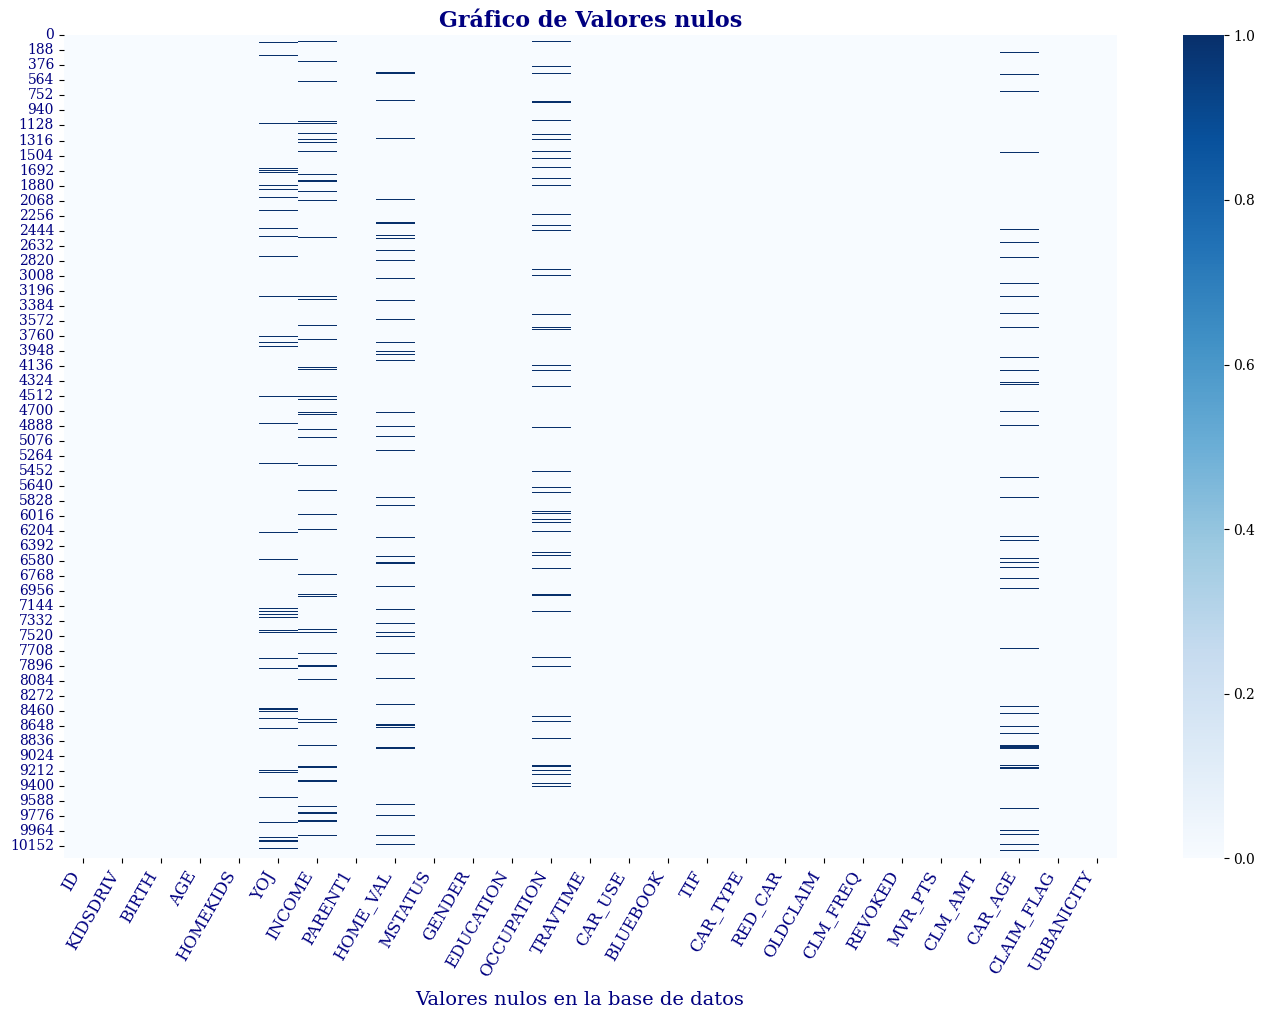

In [9]:
#El siguiente gráfico nos permite visualizar la cantidad de valores nulos que hay en nuestro dataset
# facecolor--> color  de fondo
plt.figure(figsize=(14,10), facecolor = 'white')
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Grafico para ver la proporción de valores nulos
sns.heatmap(df.isnull(), cmap = 'Blues')

# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Gráfico de Valores nulos',
          fontsize=16, color ='navy', fontweight = 'bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='navy',rotation=60, ha='right')
plt.yticks(fontsize=10, color='navy')
#Agregamos la interpretacion de la grafica
plt.figtext(0.3, -0.01, "Valores nulos en la base de datos",
            fontsize = 14, color='navy')
#Mostramos el gráfico
plt.tight_layout()
plt.show()

In [10]:
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
columnas_con_nulos

['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'OCCUPATION', 'CAR_AGE']

In [11]:
# Cuenta la cantidad de personas que sufrieron un siniestro (1) y las que no sufrieron un siniestro (0)
df['CLAIM_FLAG'].value_counts()

CLAIM_FLAG
0    7556
1    2746
Name: count, dtype: int64

<ipython-input-12-b1ba48ab1f78>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica = sns.countplot(


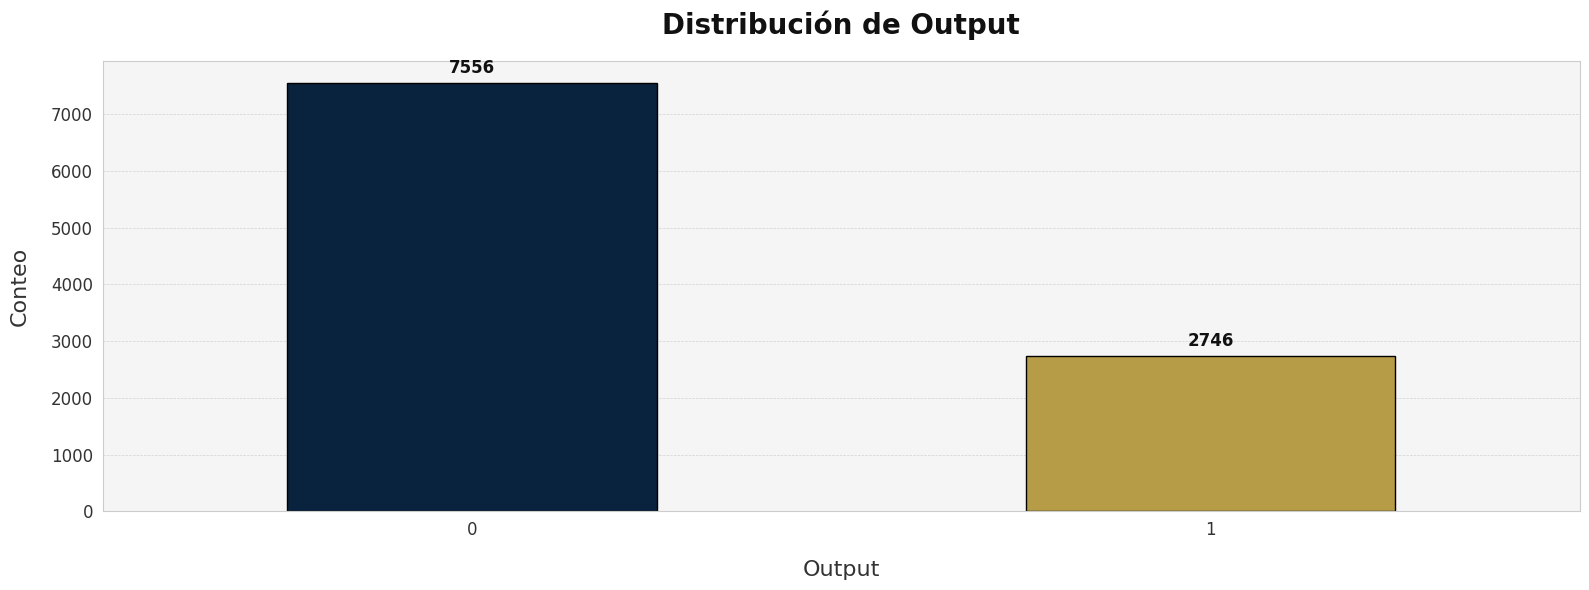

In [12]:
# Activar estilo blanco con cuadrícula
sns.set_style("whitegrid")
# Tamaño del gráfico
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

# Fondo claro
fig.patch.set_facecolor('white')
ax.set_facecolor('#f5f5f5')

# Tipografía
plt.rcParams['font.family'] = 'DejaVu Sans'

# Elegimos los colores
colors = ['#002147', '#C9A635']  # Azul y verde

# Gráfico de barras
grafica = sns.countplot(
    x='CLAIM_FLAG',
    data=df,
    palette=colors,
    edgecolor='black',
    linewidth=1,
    width=0.5
)

# Títulos y etiquetas con estilo claro
ax.set_xlabel('Output', fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel('Conteo', fontsize=16, color='#333333', labelpad=15)
ax.set_title('Distribución de Output', fontsize=20, color='#111111', fontweight='bold', pad=20)

# Ejes
ax.tick_params(axis='x', colors='#333333', labelsize=12)
ax.tick_params(axis='y', colors='#333333', labelsize=12)

# Etiquetas sobre las barras
for container in grafica.containers:
    grafica.bar_label(
        container,
        fontsize=12,
        color='#111111',
        fontweight='bold',
        padding=4
    )

# Rejilla clara y suave
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.3)

# Márgenes y distribución
plt.tight_layout()
plt.show()


In [13]:
df_entrenamiento = df.copy()

In [14]:
#Variable Target
Y = df_entrenamiento['CLAIM_FLAG']
Y

0        0
1        0
2        0
3        0
4        0
        ..
10297    0
10298    0
10299    0
10300    0
10301    0
Name: CLAIM_FLAG, Length: 10302, dtype: int64

In [15]:
#Borramos variables no significativas
df_entrenamiento.drop(['ID','BIRTH'], axis=1, inplace=True)

In [16]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    10302 non-null  int64  
 1   AGE         10295 non-null  float64
 2   HOMEKIDS    10302 non-null  int64  
 3   YOJ         9754 non-null   float64
 4   INCOME      9732 non-null   object 
 5   PARENT1     10302 non-null  object 
 6   HOME_VAL    9727 non-null   object 
 7   MSTATUS     10302 non-null  object 
 8   GENDER      10302 non-null  object 
 9   EDUCATION   10302 non-null  object 
 10  OCCUPATION  9637 non-null   object 
 11  TRAVTIME    10302 non-null  int64  
 12  CAR_USE     10302 non-null  object 
 13  BLUEBOOK    10302 non-null  object 
 14  TIF         10302 non-null  int64  
 15  CAR_TYPE    10302 non-null  object 
 16  RED_CAR     10302 non-null  object 
 17  OLDCLAIM    10302 non-null  object 
 18  CLM_FREQ    10302 non-null  int64  
 19  REVOKED     10302 non-nul

In [17]:
df_entrenamiento.shape

(10302, 25)

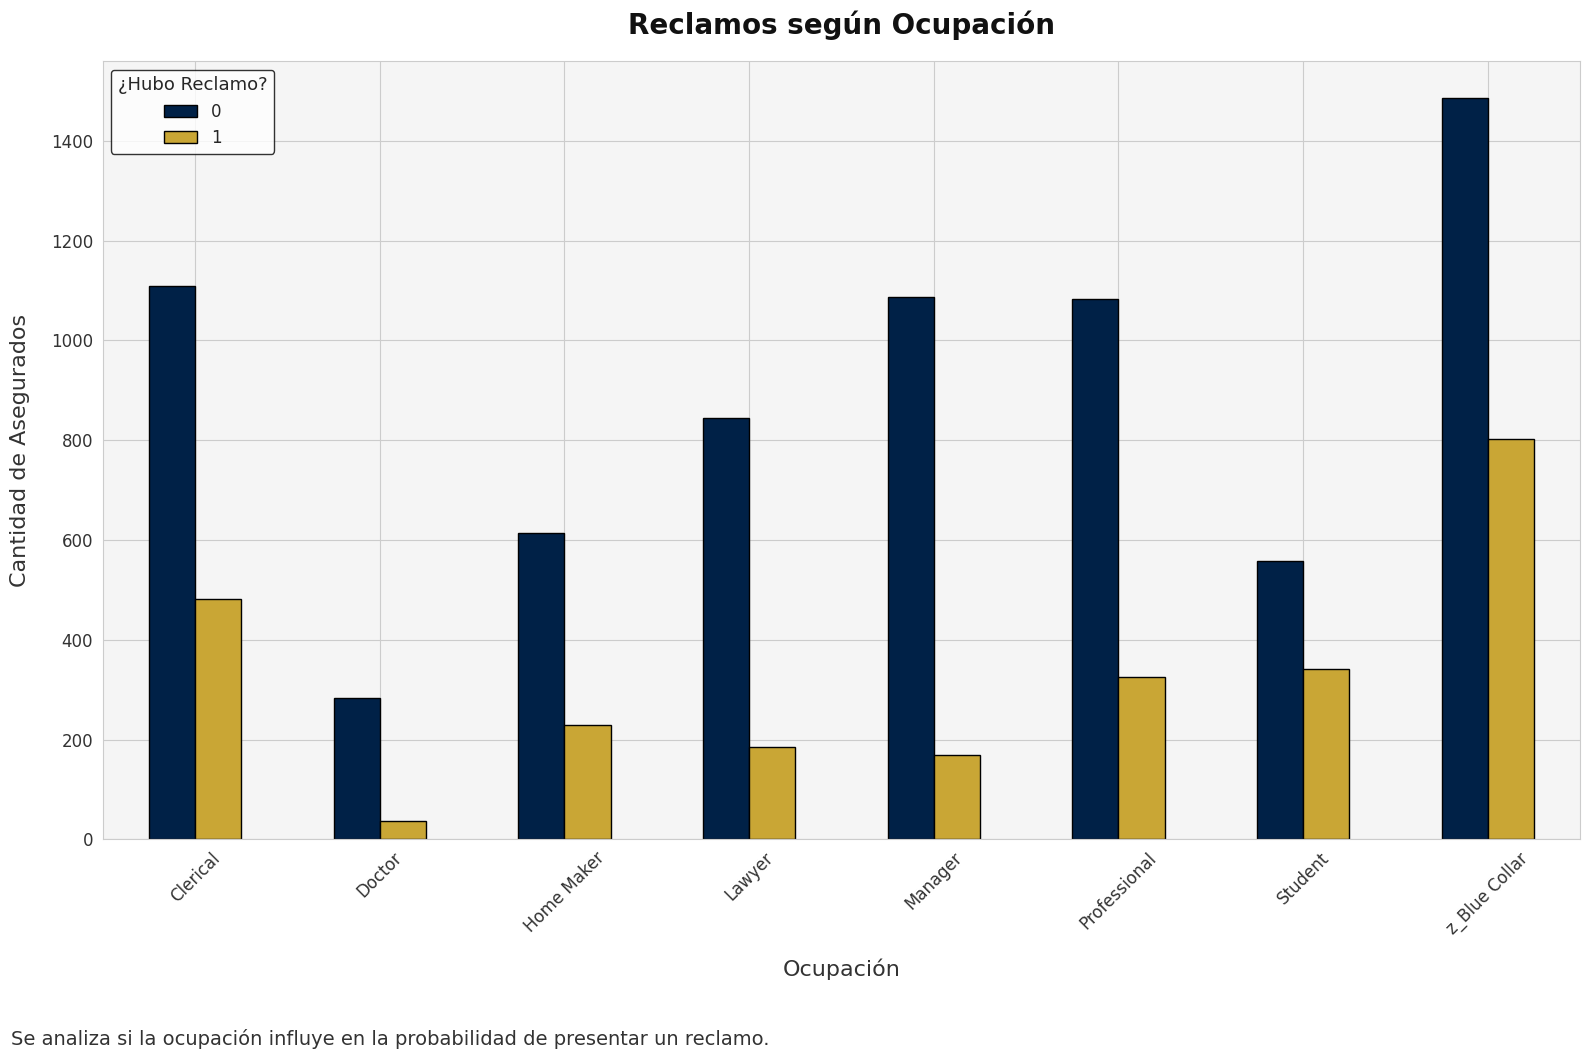

In [18]:
# Aplicamos estilo del formato base
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Crosstab para reclamos por ocupación
tabla_cruzada = pd.crosstab(df_entrenamiento['OCCUPATION'], df_entrenamiento['CLAIM_FLAG'])

# Colores
colores = ['#002147', '#C9A635']  # Azul y verde

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(16,10))
fig.patch.set_facecolor('white')
ax.set_facecolor('#f5f5f5')

# Gráfico de barras
tabla_cruzada.plot(
    kind='bar',
    color=colores,
    edgecolor='black',
    ax=ax
)

# Título y etiquetas
ax.set_title('Reclamos según Ocupación', fontsize=20, color='#111111', fontweight='bold', pad=20)
ax.set_xlabel('Ocupación', fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel('Cantidad de Asegurados', fontsize=16, color='#333333', labelpad=15)

# Ejes
ax.tick_params(axis='x', colors='#333333', labelsize=12, rotation=45)
ax.tick_params(axis='y', colors='#333333', labelsize=12)

# Leyenda
ax.legend(
    title='¿Hubo Reclamo?',
    title_fontsize=13,
    fontsize=12,
    loc='best',
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

# Texto explicativo
fig.text(
    0.01, -0.05,
    "Se analiza si la ocupación influye en la probabilidad de presentar un reclamo.",
    fontsize=14,
    color='#333333'
)

# Márgenes
plt.tight_layout()

# Mostrar
plt.show()


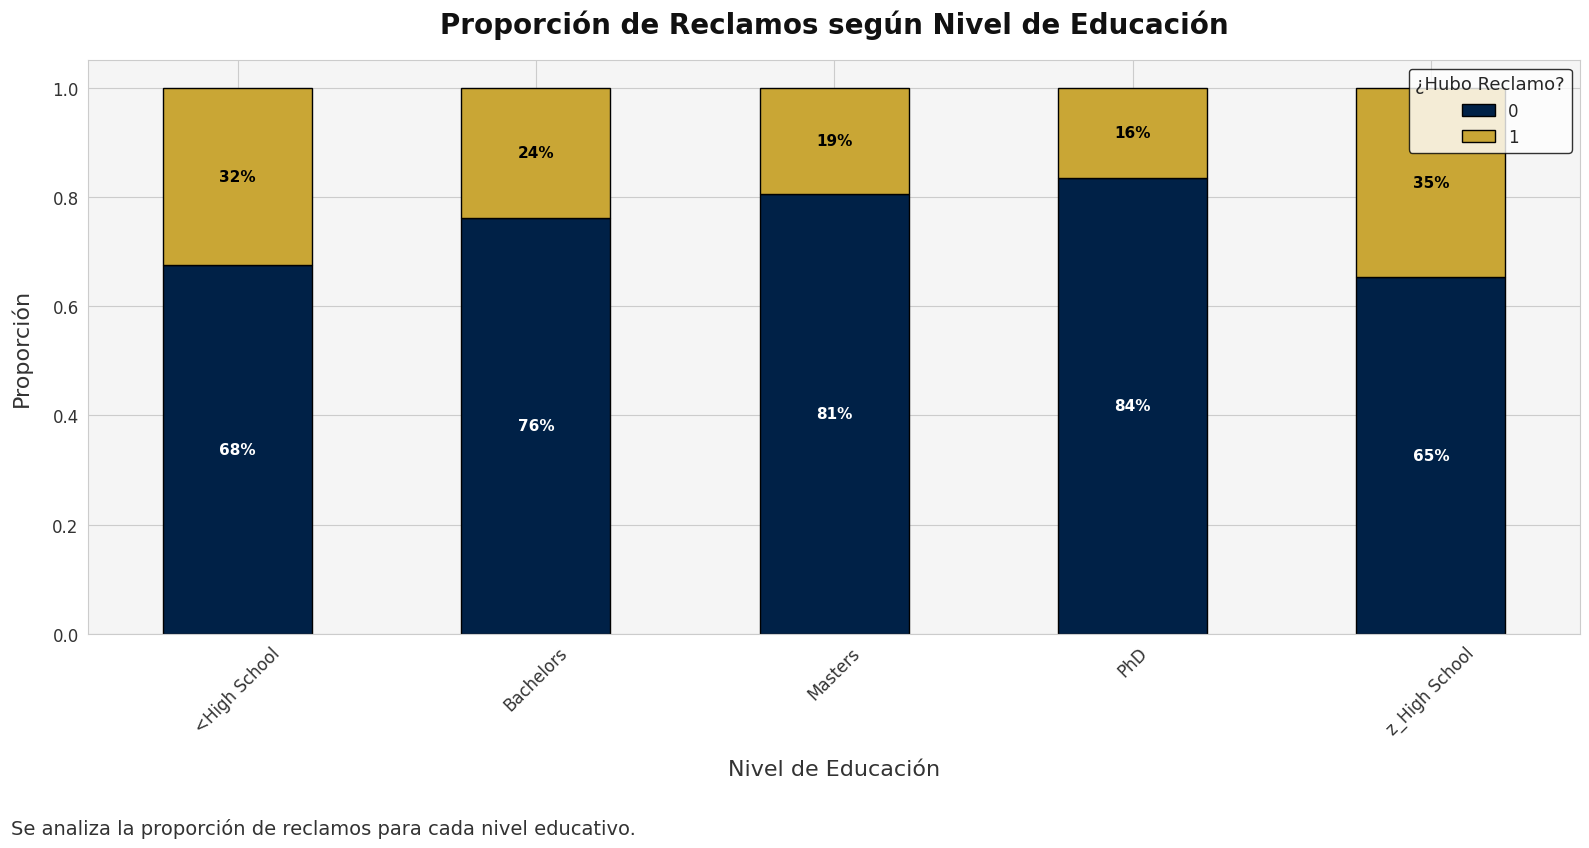

In [19]:
# Estilo formato base
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Crosstab normalizado por fila
table = pd.crosstab(df_entrenamiento['EDUCATION'], df_entrenamiento['CLAIM_FLAG'])
table_normalizada = table.div(table.sum(1).astype(float), axis=0)

# Colores UNAM
colores = ['#002147', '#C9A635']  # Azul y dorado oscuro

# Crear figura y eje
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('#f5f5f5')

# Gráfico de barras apiladas
table_normalizada.plot(
    kind='bar',
    stacked=True,
    color=colores,
    edgecolor='black',
    ax=ax
)

# Añadir porcentajes a cada segmento de barra
for i, container in enumerate(ax.containers):
    for bar in container:
        height = bar.get_height()
        if height > 0.01:  # Evitar etiquetas muy pequeñas o cero
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.0%}',
                ha='center',
                va='center',
                fontsize=11,
                color='white' if i == 0 else 'black',  # Contraste para azul y dorado
                fontweight='bold'
            )

# Título y etiquetas
ax.set_title('Proporción de Reclamos según Nivel de Educación',
             fontsize=20, color='#111111', fontweight='bold', pad=20)

ax.set_xlabel('Nivel de Educación', fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel('Proporción', fontsize=16, color='#333333', labelpad=15)

# Ejes
ax.tick_params(axis='x', colors='#333333', labelsize=12, rotation=45)
ax.tick_params(axis='y', colors='#333333', labelsize=12)

# Leyenda
ax.legend(
    title='¿Hubo Reclamo?',
    title_fontsize=13,
    fontsize=12,
    loc='best',
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

# Texto explicativo
fig.text(
    0.01, -0.05,
    "Se analiza la proporción de reclamos para cada nivel educativo.",
    fontsize=14,
    color='#333333'
)

# Márgenes y presentación
plt.tight_layout()
plt.show()


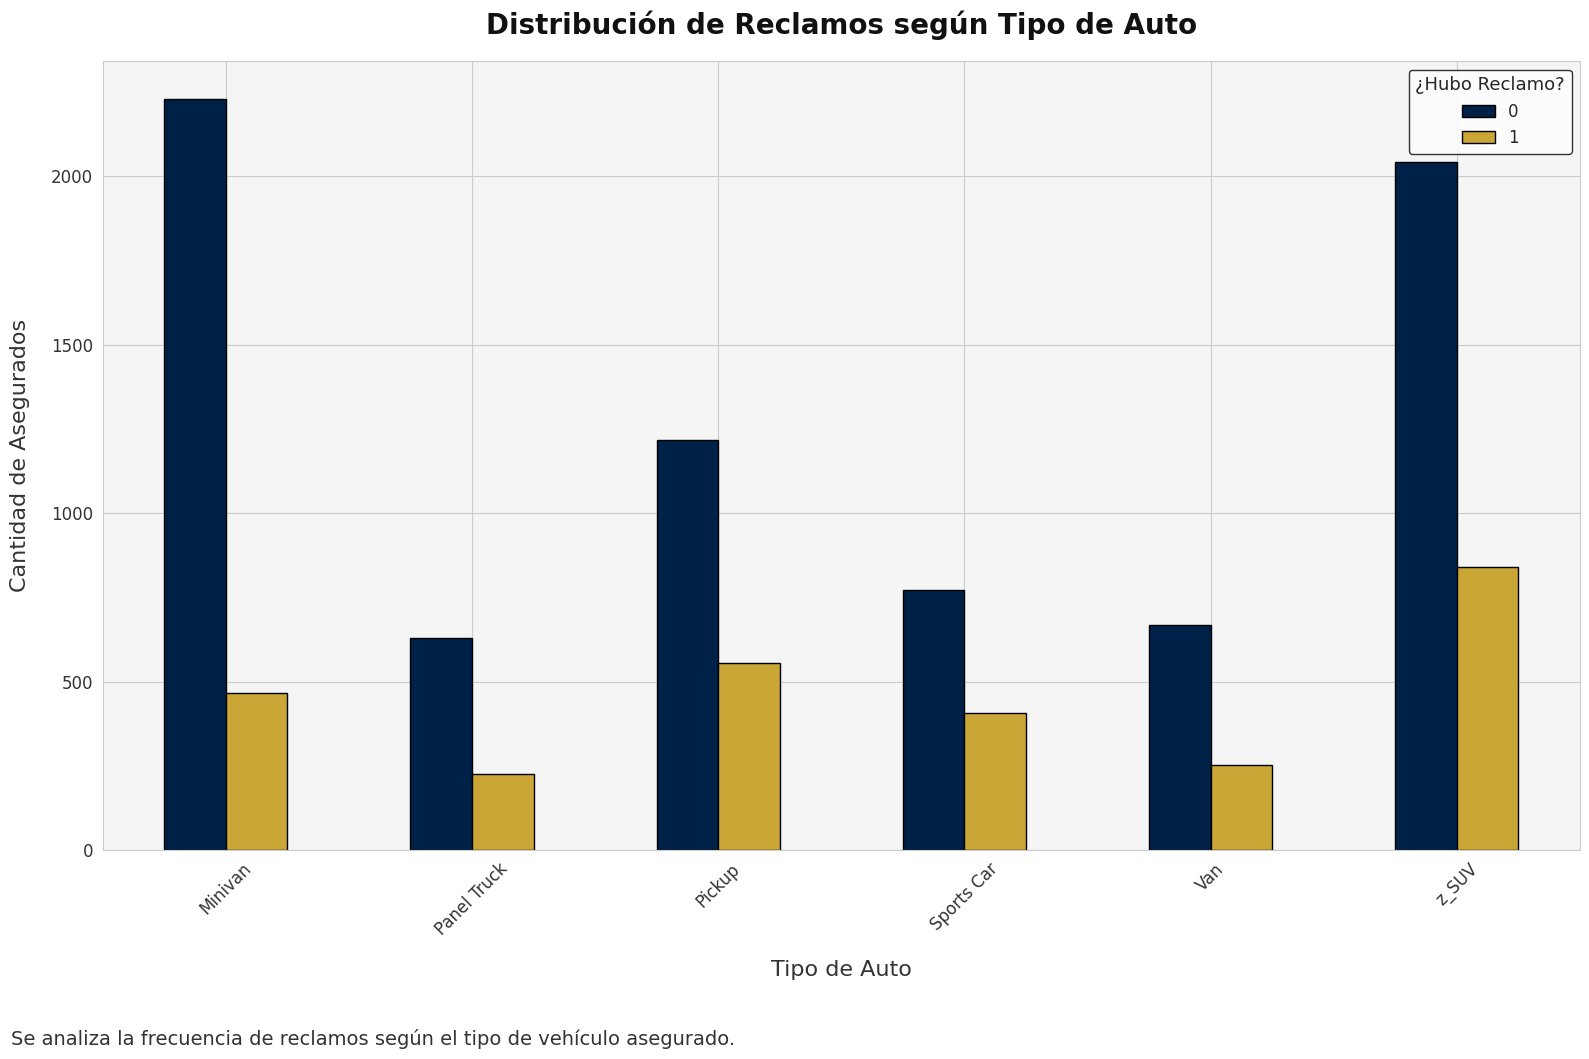

In [20]:
# Aplicamos el estilo base
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Crosstab: Reclamos por tipo de auto
table_car_type = pd.crosstab(df_entrenamiento['CAR_TYPE'], df_entrenamiento['CLAIM_FLAG'])

# Colores (coherentes con reclamos sí/no)
colores = ['#002147', '#C9A635']  # Azul y verde

# Crear figura y eje
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('white')
ax.set_facecolor('#f5f5f5')

# Gráfico de barras
table_car_type.plot(
    kind='bar',
    color=colores,
    edgecolor='black',
    ax=ax,
    legend=True
)

# Título y etiquetas
ax.set_title(
    'Distribución de Reclamos según Tipo de Auto',
    fontsize=20,
    color='#111111',
    fontweight='bold',
    pad=20
)

ax.set_xlabel('Tipo de Auto', fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel('Cantidad de Asegurados', fontsize=16, color='#333333', labelpad=15)

# Ejes
ax.tick_params(axis='x', colors='#333333', labelsize=12, rotation=45)
ax.tick_params(axis='y', colors='#333333', labelsize=12)

# Leyenda
ax.legend(
    title='¿Hubo Reclamo?',
    title_fontsize=13,
    fontsize=12,
    loc='best',
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

# Texto explicativo debajo del gráfico
fig.text(
    0.01, -0.05,
    "Se analiza la frecuencia de reclamos según el tipo de vehículo asegurado.",
    fontsize=14,
    color='#333333'
)

# Acomodar elementos y guardar imagen
plt.tight_layout()
plt.savefig('car_type_claim_flag_distribution.png', dpi=300, bbox_inches='tight')

plt.show()


In [21]:
# Aplicar estilo formato base
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Crosstab: Reclamos por uso del vehículo
table_car_use = pd.crosstab(df_entrenamiento['CAR_USE'], df_entrenamiento['CLAIM_FLAG'])

# Colores coherentes con el formato base (azul y verde)
colores = ['#002147', '#C9A635']

# Crear figura y eje
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('white')
ax.set_facecolor('#f5f5f5')

# Gráfico de barras
table_car_use.plot(
    kind='bar',
    color=colores,
    edgecolor='black',
    ax=ax,
    legend=True
)

# Título y etiquetas
ax.set_title(
    'Distribución de Reclamos según Uso del Vehículo',
    fontsize=20,
    color='#111111',
    fontweight='bold',
    pad=20
)

ax.set_xlabel('Uso del Vehículo', fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel('Cantidad de Asegurados', fontsize=16, color='#333333', labelpad=15)

# Estilo de ejes
ax.tick_params(axis='x', colors='#333333', labelsize=12, rotation=45)
ax.tick_params(axis='y', colors='#333333', labelsize=12)

# Leyenda
ax.legend(
    title='¿Hubo Reclamo?',
    title_fontsize=13,
    fontsize=12,
    loc='best',
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

# Texto descriptivo
fig.text(
    0.01, -0.05,
    "Se analiza la frecuencia de reclamos según si el vehículo es de uso comercial o privado.",
    fontsize=14,
    color='#333333'
)

# Acomodar elementos
plt.tight_layout()
plt.show()


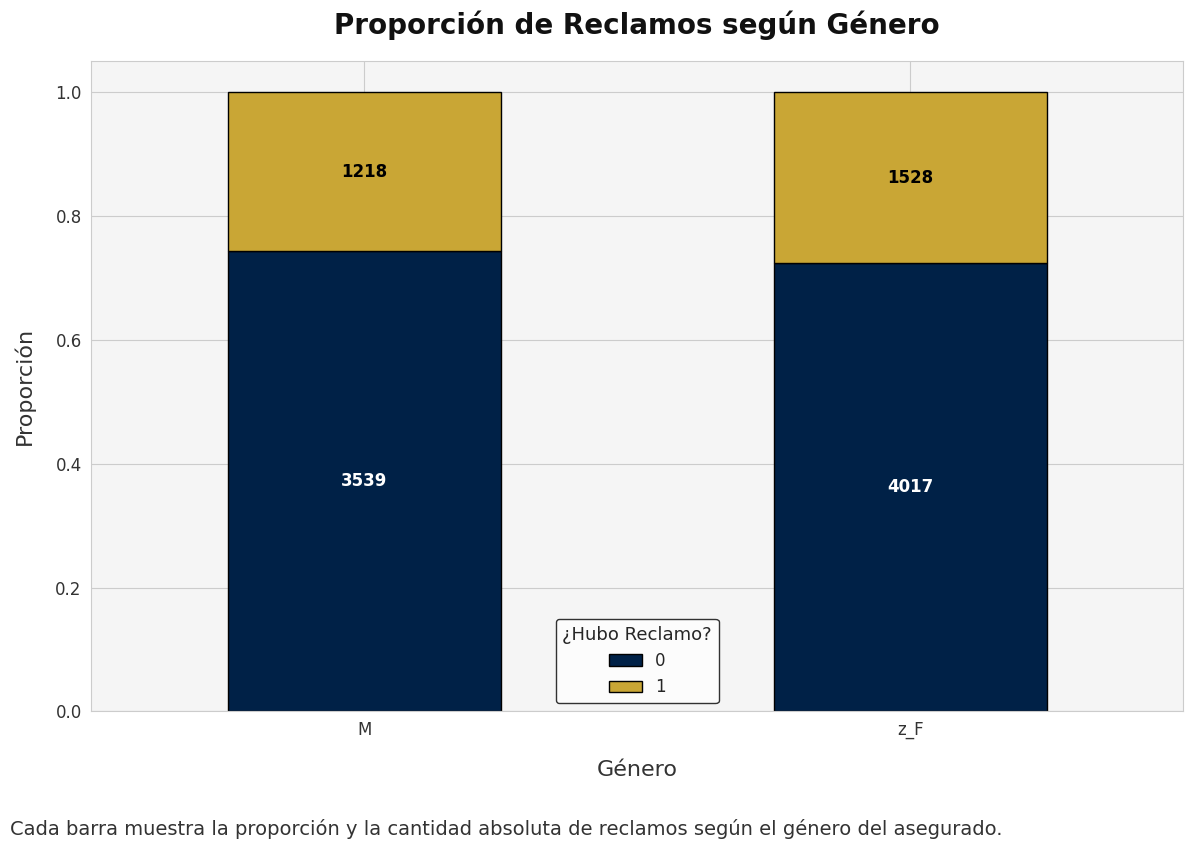

In [22]:
# Aplicamos el estilo base
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Crear la tabla cruzada (conteo absoluto) y normalizada (proporciones)
table = pd.crosstab(df_entrenamiento['GENDER'], df_entrenamiento['CLAIM_FLAG'])
table_normalizada = table.div(table.sum(1).astype(float), axis=0)

# Colores para el gráfico
colores = ['#002147', '#C9A635']  # Azul oscuro y dorado

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('#f5f5f5')

# Gráfico de barras apiladas (normalizado)
table_normalizada.plot(
    kind='bar',
    stacked=True,
    color=colores,
    edgecolor='black',
    ax=ax
)

# Títulos y etiquetas
ax.set_title(
    'Proporción de Reclamos según Género',
    fontsize=20,
    color='#111111',
    fontweight='bold',
    pad=20
)
ax.set_xlabel('Género', fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel('Proporción', fontsize=16, color='#333333', labelpad=15)
ax.tick_params(axis='x', colors='#333333', labelsize=12, rotation=0)
ax.tick_params(axis='y', colors='#333333', labelsize=12)

# Leyenda
ax.legend(
    title='¿Hubo Reclamo?',
    title_fontsize=13,
    fontsize=12,
    loc='best',
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

# Añadir los valores absolutos sobre las barras
for i, genero in enumerate(table.index):
    sin_reclamo = table.loc[genero, 0]
    con_reclamo = table.loc[genero, 1]
    total = sin_reclamo + con_reclamo

    # Añadimos número de clientes sin reclamos (mitad inferior de la barra)
    ax.text(
        i, table_normalizada.loc[genero, 0] / 2,
        f"{sin_reclamo}",
        ha='center', va='center',
        color='white', fontsize=12, fontweight='bold'
    )

    # Añadimos número de clientes con reclamos (mitad superior de la barra)
    ax.text(
        i,
        table_normalizada.loc[genero, 0] + table_normalizada.loc[genero, 1] / 2,
        f"{con_reclamo}",
        ha='center', va='center',
        color='black', fontsize=12, fontweight='bold'
    )

# Pie de gráfico
fig.text(
    0.01, -0.05,
    "Cada barra muestra la proporción y la cantidad absoluta de reclamos según el género del asegurado.",
    fontsize=14,
    color='#333333'
)

# Ajuste final
plt.tight_layout()
plt.show()


---
##**Variables dummies**
---

In [23]:
df_entrenamiento = pd.get_dummies(df_entrenamiento,
                                  columns = ['PARENT1',
                                            'MSTATUS',
                                            'GENDER',
                                            'EDUCATION',
                                            'OCCUPATION',
                                            'CAR_USE',
                                            'CAR_TYPE',
                                            'RED_CAR',
                                            'REVOKED',
                                            'URBANICITY'],
                                  drop_first = True)

In [24]:
#Reemplazamos los valores de False por 0 y de True por 1
df_entrenamiento = df_entrenamiento.replace({False: 0, True: 1})

<ipython-input-24-ace71f993de3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_entrenamiento = df_entrenamiento.replace({False: 0, True: 1})


In [25]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   KIDSDRIV                          10302 non-null  int64  
 1   AGE                               10295 non-null  float64
 2   HOMEKIDS                          10302 non-null  int64  
 3   YOJ                               9754 non-null   float64
 4   INCOME                            9732 non-null   object 
 5   HOME_VAL                          9727 non-null   object 
 6   TRAVTIME                          10302 non-null  int64  
 7   BLUEBOOK                          10302 non-null  object 
 8   TIF                               10302 non-null  int64  
 9   OLDCLAIM                          10302 non-null  object 
 10  CLM_FREQ                          10302 non-null  int64  
 11  MVR_PTS                           10302 non-null  int64  
 12  CLM_

In [26]:
variables_objetos= df_entrenamiento.select_dtypes(include=['object']).columns.tolist()
variables_objetos

['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT']

In [27]:
#Eliminamos el signo de pesos que aparece al inicio
df_entrenamiento['INCOME'] = df_entrenamiento['INCOME'].replace({'\$': '', ',': ''}, regex=True)

In [28]:
# Convertir los valores de las variables numéricas a tipo numérico si no lo son
# El argumento 'errors="coerce"' convierte valores no válidos como texto, nulos, etc. en NaN, para así asegurar que las columnas sean consistentes
for i in variables_objetos:
  df_entrenamiento[i] = df_entrenamiento[i].replace({'\$': '', ',': ''}, regex=True)
  df_entrenamiento[i] = pd.to_numeric(df_entrenamiento[i], errors='coerce')

In [29]:
df_entrenamiento.head()

KIDSDRIV   AGE  HOMEKIDS   YOJ   INCOME  HOME_VAL  TRAVTIME  BLUEBOOK  TIF  \
0         0  60.0         0  11.0  67349.0       0.0        14     14230   11   
1         0  43.0         0  11.0  91449.0  257252.0        22     14940    1   
2         0  48.0         0  11.0  52881.0       0.0        26     21970    1   
3         0  35.0         1  10.0  16039.0  124191.0         5      4010    4   
4         0  51.0         0  14.0      NaN  306251.0        32     15440    7   

   OLDCLAIM  ...  OCCUPATION_z_Blue Collar  CAR_USE_Private  \
0      4461  ...                         0                1   
1         0  ...                         1                0   
2         0  ...                         0                1   
3     38690  ...                         0                1   
4         0  ...                         1                1   

   CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_Sports Car  CAR_TYPE_Van  \
0                     0                0                    0             0   
1                     0                0                    0             0   
2                     0                0                    0             1   
3                     0                0                    0             0   
4                     0                0                    0             0   

   CAR_TYPE_z_SUV  RED_CAR_yes  REVOKED_Yes  URBANICITY_z_Highly Rural/ Rural  
0               0            1            0                                 0  
1               0            1            0                                 0  
2               0            1            0                                 0  
3               1            0            0                                 0  
4               0            1            0                                 0  

[5 rows x 38 columns]

In [30]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   KIDSDRIV                          10302 non-null  int64  
 1   AGE                               10295 non-null  float64
 2   HOMEKIDS                          10302 non-null  int64  
 3   YOJ                               9754 non-null   float64
 4   INCOME                            9732 non-null   float64
 5   HOME_VAL                          9727 non-null   float64
 6   TRAVTIME                          10302 non-null  int64  
 7   BLUEBOOK                          10302 non-null  int64  
 8   TIF                               10302 non-null  int64  
 9   OLDCLAIM                          10302 non-null  int64  
 10  CLM_FREQ                          10302 non-null  int64  
 11  MVR_PTS                           10302 non-null  int64  
 12  CLM_

---
##**Valores Nulos**
---

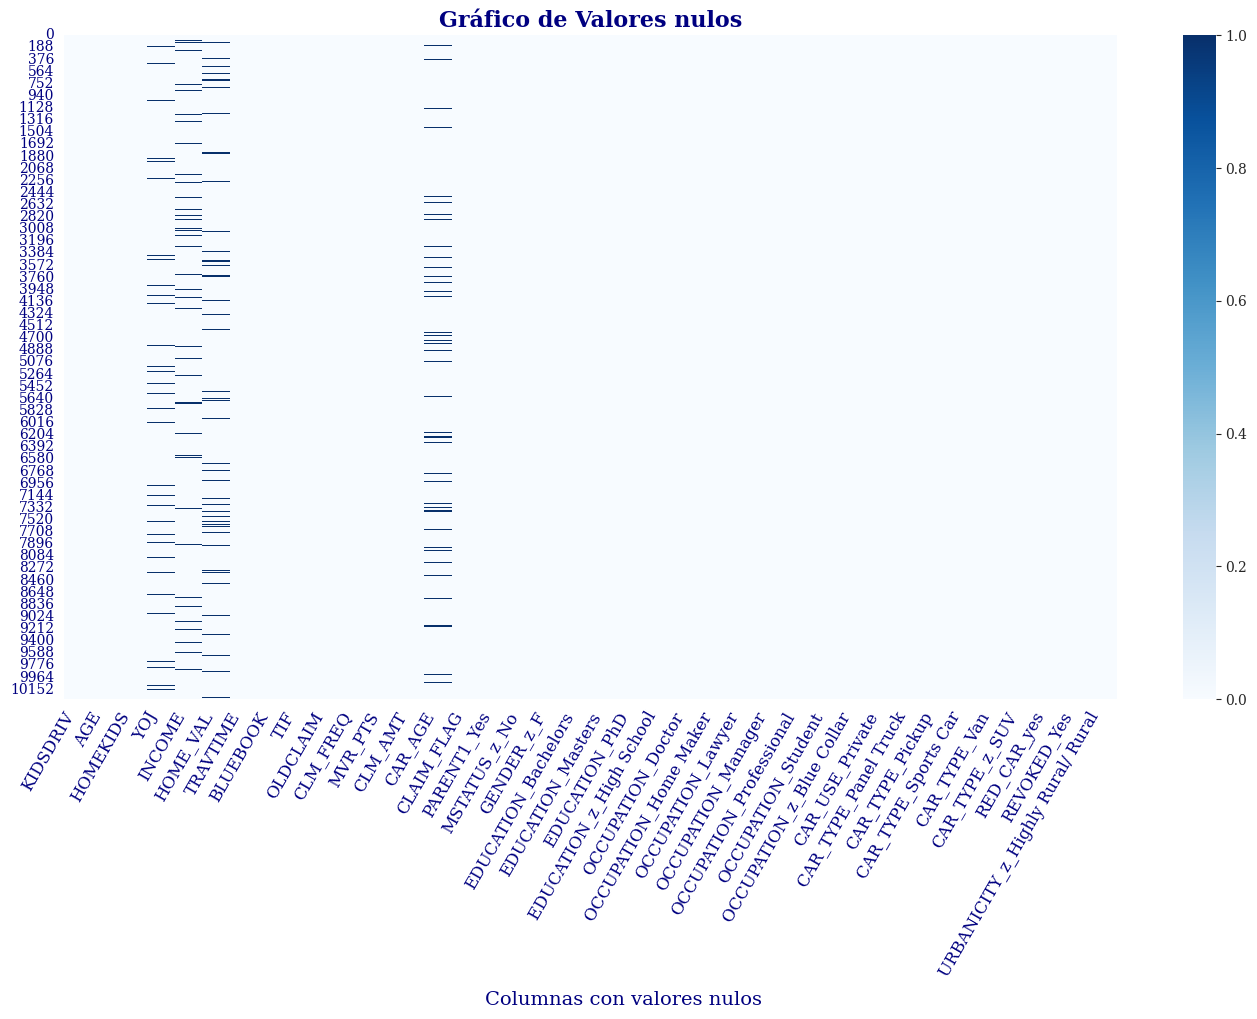

In [31]:
#El siguiente gráfico nos permite visualizar la cantidad de valores nulos que hay en nuestro dataset
# facecolor--> color  de fondo
plt.figure(figsize=(14,10), facecolor = 'white')
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Grafico para ver la proporción de valores nulos
sns.heatmap(df_entrenamiento.isnull(), cmap = 'Blues')

# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Gráfico de Valores nulos',
          fontsize=16, color ='navy', fontweight = 'bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='navy',rotation=60, ha='right')
plt.yticks(fontsize=10, color='navy')
#Agregamos la interpretacion de la grafica
plt.figtext(0.35, -0.01, "Columnas con valores nulos",
            fontsize = 14, color='navy')
#Mostramos el gráfico
plt.tight_layout()
plt.show()

In [32]:
#Veamos el porcentaje de valores nulos de las columnas

df_entrenamiento[["YOJ", 'INCOME', 'HOME_VAL', 'OLDCLAIM', 'CLM_AMT' , 'BLUEBOOK', "CAR_AGE"]].isnull().mean()*100

YOJ         5.319355
INCOME      5.532906
HOME_VAL    5.581440
OLDCLAIM    0.000000
CLM_AMT     0.000000
BLUEBOOK    0.000000
CAR_AGE     6.202679
dtype: float64

In [33]:
#Debido a que tienen un porcentaje menor al 6% eliminamos los valores nulos
df_entrenamiento.dropna(subset=["YOJ", 'INCOME', 'HOME_VAL', 'OLDCLAIM', 'CLM_AMT' , 'BLUEBOOK', "CAR_AGE"], inplace=True)

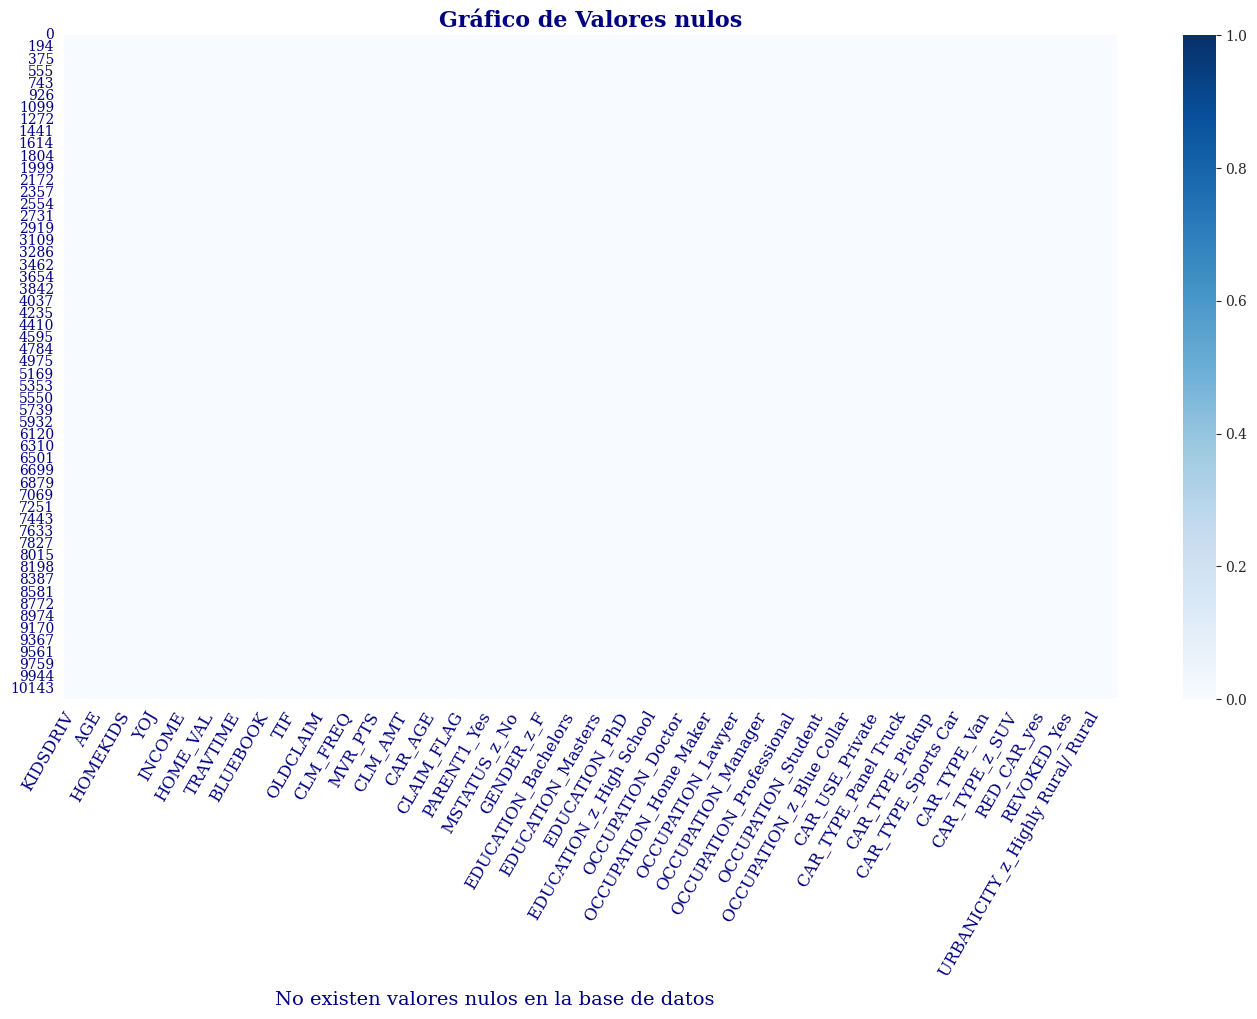

In [34]:
#El siguiente gráfico nos permite visualizar la cantidad de valores nulos que hay en nuestro dataset
# facecolor--> color  de fondo
plt.figure(figsize=(14,10), facecolor = 'white')
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Grafico para ver la proporción de valores nulos
sns.heatmap(df_entrenamiento.isnull(), cmap = 'Blues')

# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Gráfico de Valores nulos',
          fontsize=16, color ='navy', fontweight = 'bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='navy',rotation=60, ha='right')
plt.yticks(fontsize=10, color='navy')
#Agregamos la interpretacion de la grafica
plt.figtext(0.2, -0.01, "No existen valores nulos en la base de datos",
            fontsize = 14, color='navy')
#Mostramos el gráfico
plt.tight_layout()
plt.show()

In [35]:
# Ver cuántos NaNs hay por columna
print(df_entrenamiento.isna().sum())

KIDSDRIV                            0
AGE                                 4
HOMEKIDS                            0
YOJ                                 0
INCOME                              0
HOME_VAL                            0
TRAVTIME                            0
BLUEBOOK                            0
TIF                                 0
OLDCLAIM                            0
CLM_FREQ                            0
MVR_PTS                             0
CLM_AMT                             0
CAR_AGE                             0
CLAIM_FLAG                          0
PARENT1_Yes                         0
MSTATUS_z_No                        0
GENDER_z_F                          0
EDUCATION_Bachelors                 0
EDUCATION_Masters                   0
EDUCATION_PhD                       0
EDUCATION_z_High School             0
OCCUPATION_Doctor                   0
OCCUPATION_Home Maker               0
OCCUPATION_Lawyer                   0
OCCUPATION_Manager                  0
OCCUPATION_P

In [36]:
# Ver cuántos NaNs hay en total
print(df_entrenamiento.isna().sum().sum())

4


In [37]:
df_entrenamiento.dropna(subset=["AGE"], inplace=True)

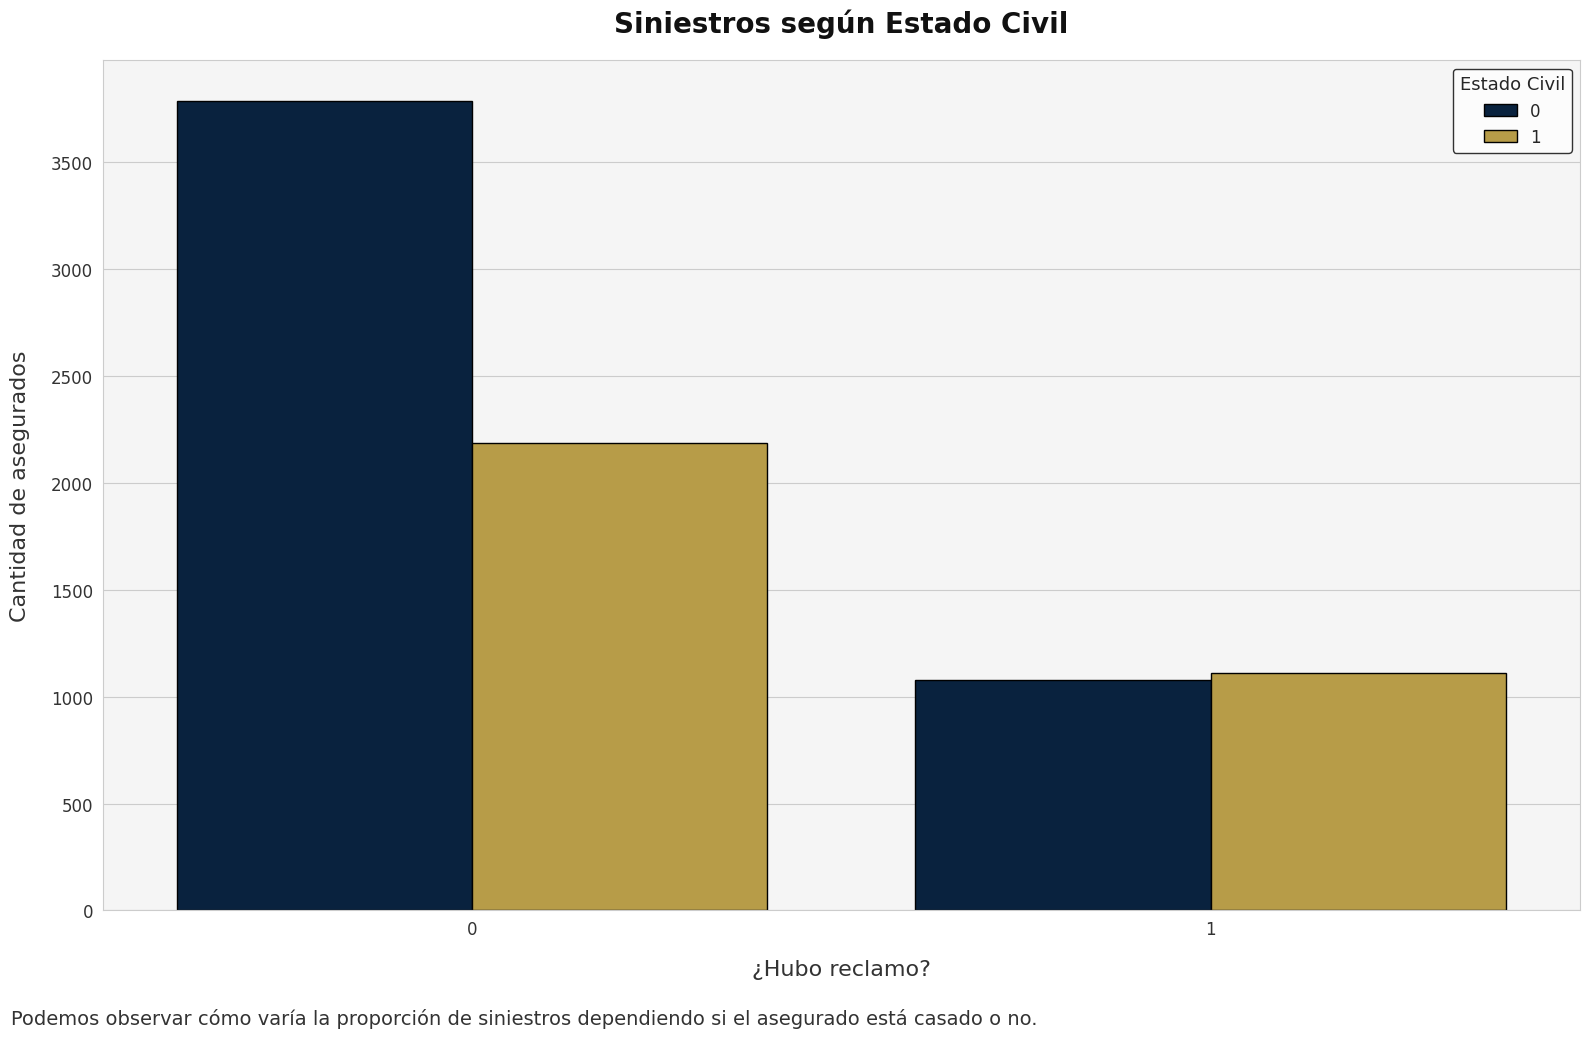

In [38]:
# Configuración general formato base
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Crear figura y eje
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('white')       # Fondo del lienzo blanco
ax.set_facecolor('#f5f5f5')            # Área de gráfica gris claro

# Paleta de colores UNAM
palette = ['#002147', '#C9A635']  # Azul UNAM y dorado oscuro

# Gráfico countplot con hue
sns.countplot(
    x='CLAIM_FLAG',
    hue='MSTATUS_z_No',
    data=df_entrenamiento,
    palette=palette,
    edgecolor='black',
    ax=ax
)

# Título
ax.set_title(
    'Siniestros según Estado Civil',
    fontsize=20,
    color='#111111',
    fontweight='bold',
    pad=20
)

# Etiquetas ejes
ax.set_xlabel('¿Hubo reclamo?', fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel('Cantidad de asegurados', fontsize=16, color='#333333', labelpad=15)

# Estilo ticks
ax.tick_params(axis='x', colors='#333333', labelsize=12, rotation=0)
ax.tick_params(axis='y', colors='#333333', labelsize=12)

# Leyenda con estilo base
ax.legend(
    title='Estado Civil',
    title_fontsize=13,
    fontsize=12,
    loc='best',
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

# Texto interpretativo
fig.text(
    0.01, -0.03,
    "Podemos observar cómo varía la proporción de siniestros dependiendo si el asegurado está casado o no.",
    fontsize=14,
    color='#333333'
)

# Ajuste layout
plt.tight_layout()
plt.show()


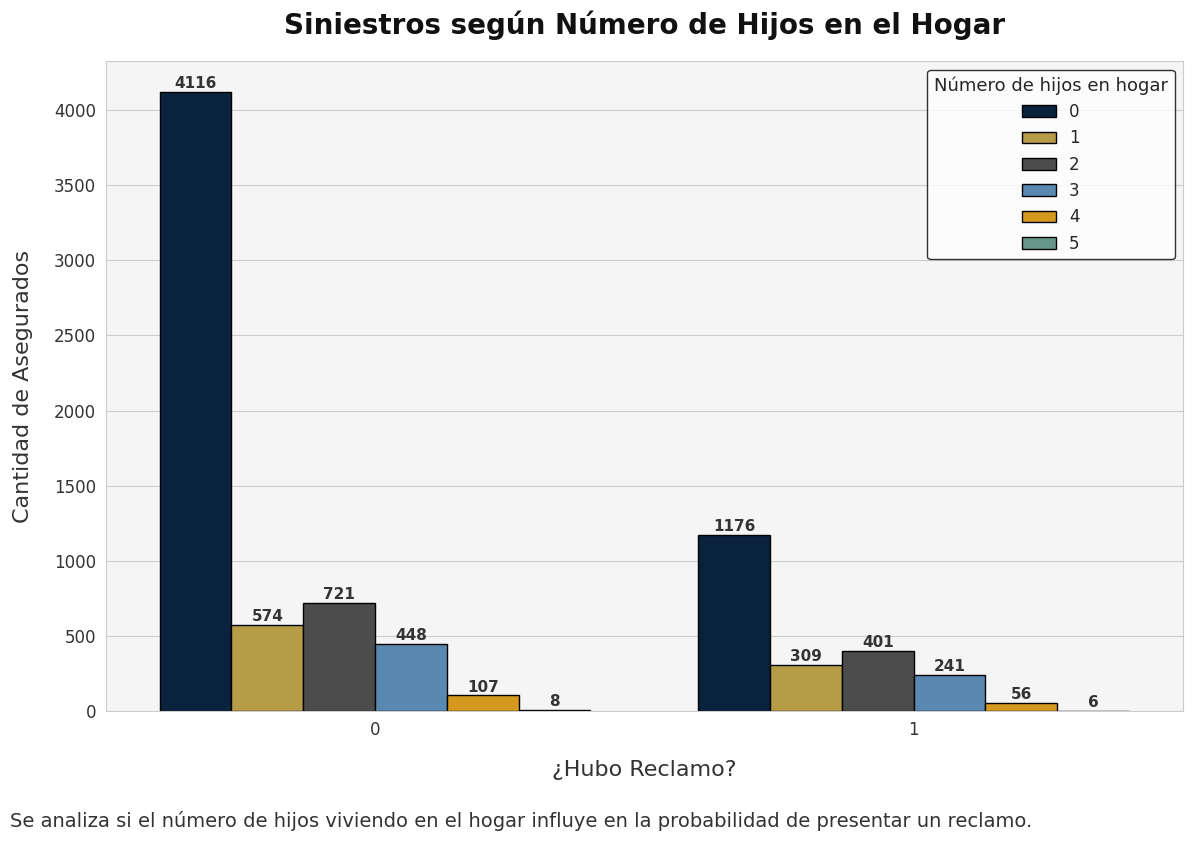

In [39]:
# Configuración general
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('#f5f5f5')

# Paleta extendida profesional
colores_personalizados = [
    '#002147',  # Azul UNAM
    '#C9A635',  # Dorado UNAM
    '#4C4C4C',  # Gris oscuro
    '#4B8BBE',  # Azul claro
    '#F4A300',  # Naranja suave
    '#5F9E8F'   # Verde grisáceo
]

# Número único de hijos en el hogar
num_colores = df_entrenamiento['HOMEKIDS'].nunique()
palette = colores_personalizados[:num_colores]

# Gráfico de barras agrupadas
plot = sns.countplot(
    x='CLAIM_FLAG',
    hue='HOMEKIDS',
    data=df_entrenamiento,
    palette=palette,
    edgecolor='black',
    ax=ax
)

# Título y etiquetas
ax.set_title(
    'Siniestros según Número de Hijos en el Hogar',
    fontsize=20,
    color='#111111',
    fontweight='bold',
    pad=20
)
ax.set_xlabel('¿Hubo Reclamo?', fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel('Cantidad de Asegurados', fontsize=16, color='#333333', labelpad=15)

# Estilo de ticks
ax.tick_params(axis='x', colors='#333333', labelsize=12, rotation=0)
ax.tick_params(axis='y', colors='#333333', labelsize=12)

# Leyenda con estilo
ax.legend(
    title='Número de hijos en hogar',
    title_fontsize=13,
    fontsize=12,
    loc='best',
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

# Añadir los conteos encima de las barras
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 5,
            f'{int(height)}',
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight='bold',
            color='#333333'
        )

# Pie de gráfico
fig.text(
    0.01, -0.04,
    "Se analiza si el número de hijos viviendo en el hogar influye en la probabilidad de presentar un reclamo.",
    fontsize=14,
    color='#333333'
)

# Ajustar el layout final
plt.tight_layout()
plt.show()


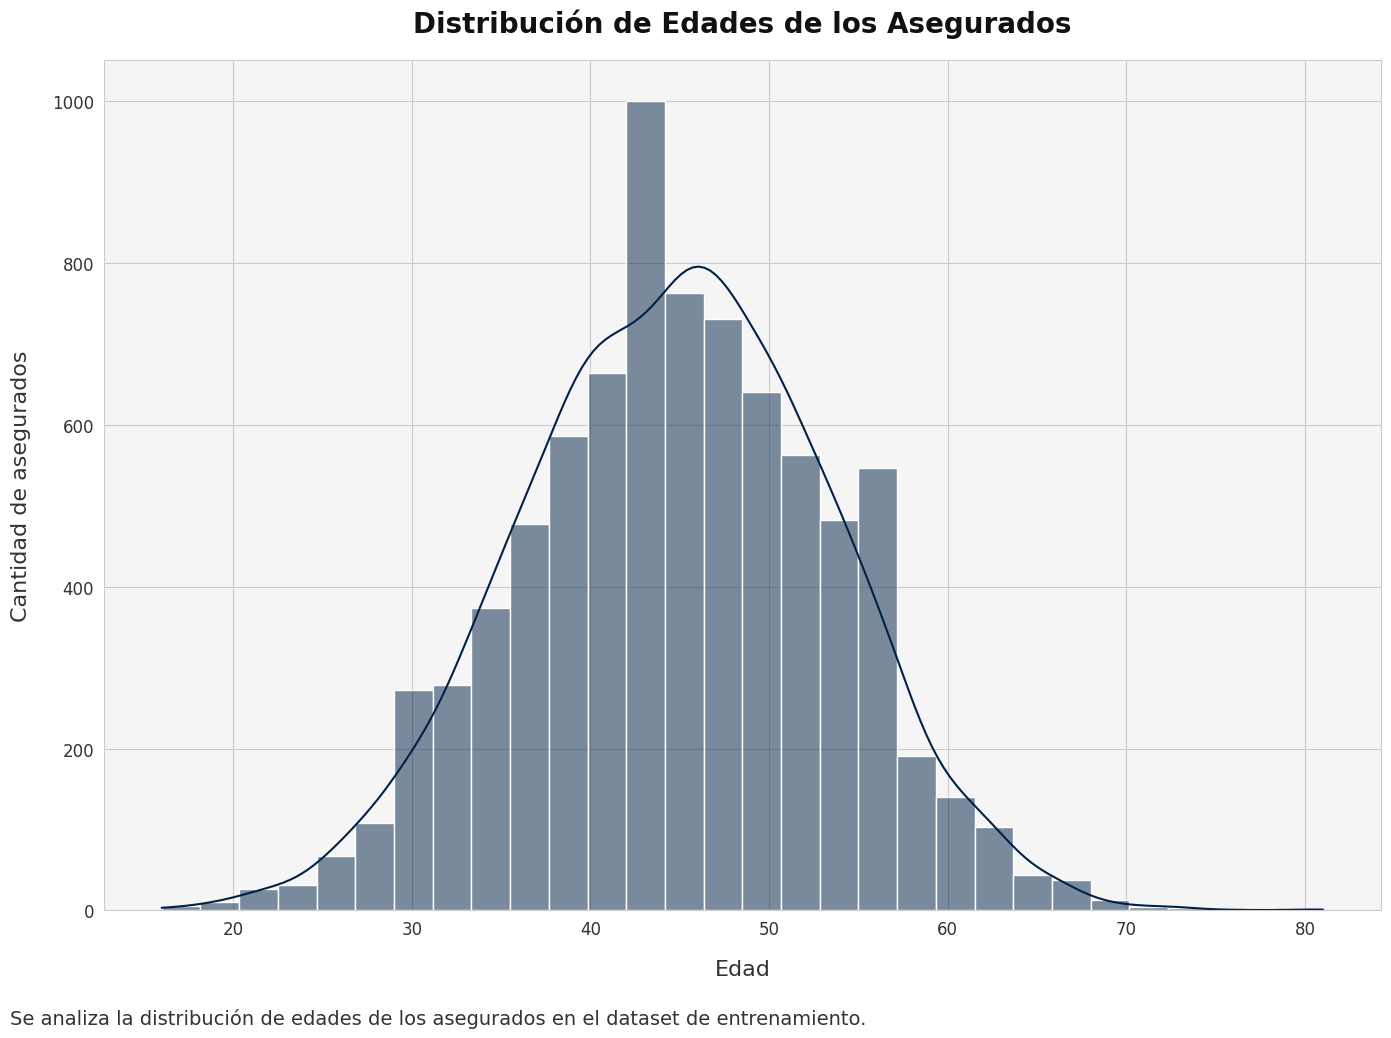

In [40]:
# Configuración general formato base
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Crear figura y eje
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('white')
ax.set_facecolor('#f5f5f5')


# Histograma con densidad de kernel
sns.histplot(
    df_entrenamiento['AGE'].dropna(),
    kde=True,
    bins=30,
    color='#002147',  # naranja profesional y suave
    ax=ax
)

# Título y etiquetas
ax.set_title(
    'Distribución de Edades de los Asegurados',
    fontsize=20,
    color='#111111',
    fontweight='bold',
    pad=20
)
ax.set_xlabel('Edad', fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel('Cantidad de asegurados', fontsize=16, color='#333333', labelpad=15)

# Estilo de ticks
ax.tick_params(axis='x', colors='#333333', labelsize=12, rotation=0)
ax.tick_params(axis='y', colors='#333333', labelsize=12)

# Texto explicativo debajo del gráfico
fig.text(
    0.01, -0.03,
    "Se analiza la distribución de edades de los asegurados en el dataset de entrenamiento.",
    fontsize=14,
    color='#333333'
)

# Ajuste layout y mostrar
plt.tight_layout()
plt.show()


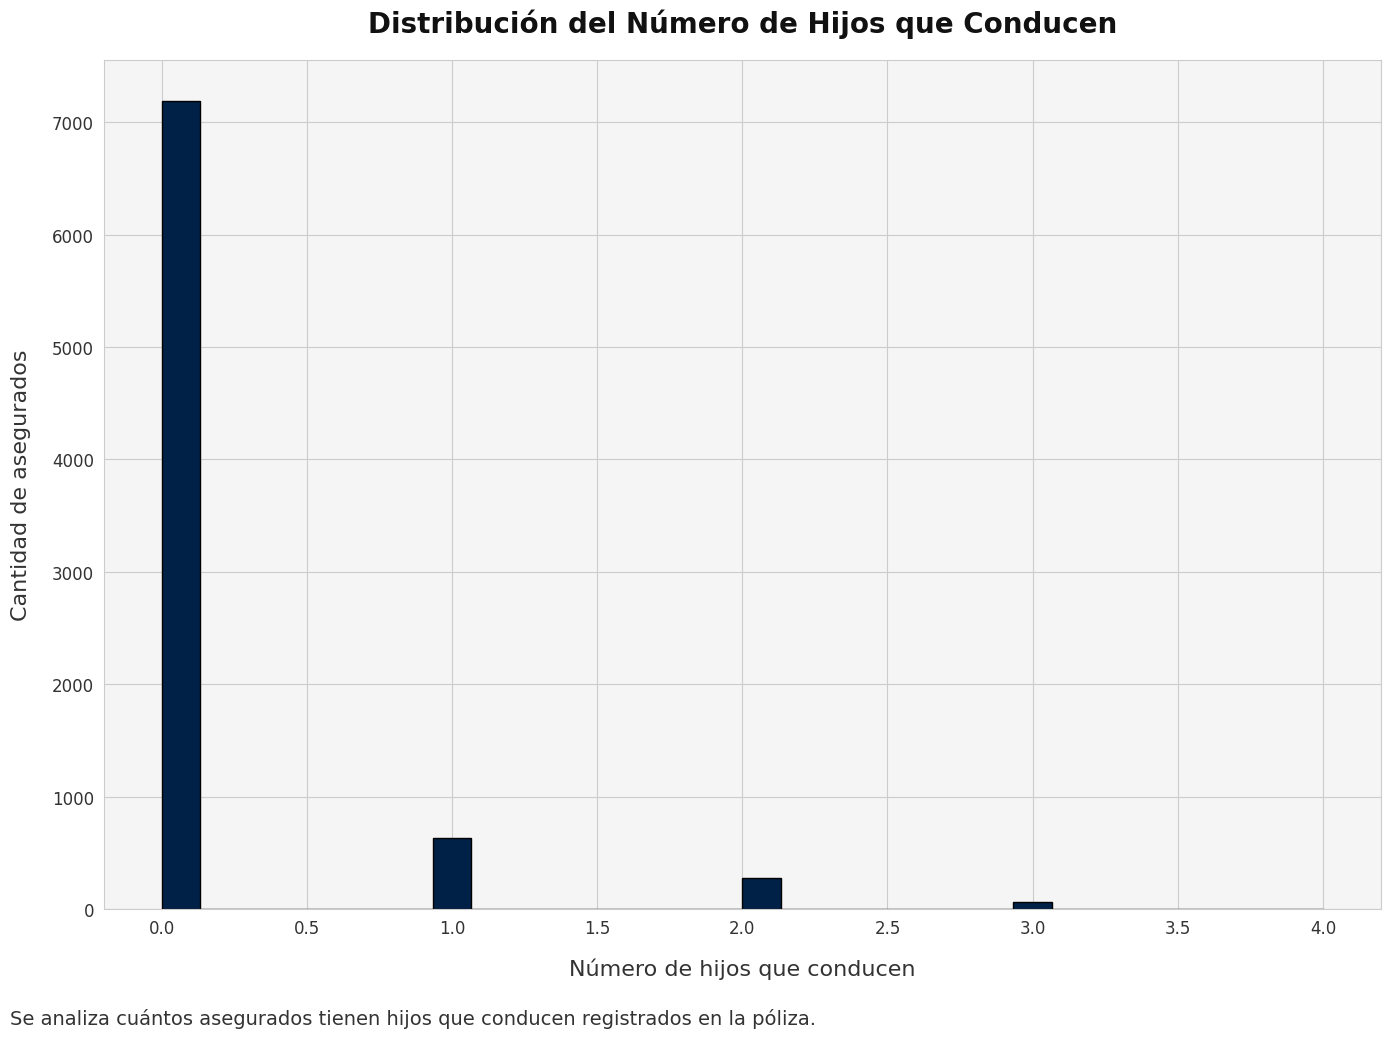

In [41]:
# Configuración general formato base
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Crear figura y eje
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('white')
ax.set_facecolor('#f5f5f5')

# Histograma
df_entrenamiento['KIDSDRIV'].dropna().plot.hist(
    bins=30,
    color='#002147',   # naranja profesional y suave
    edgecolor='black',
    ax=ax
)

# Título y etiquetas
ax.set_title(
    'Distribución del Número de Hijos que Conducen',
    fontsize=20,
    color='#111111',
    fontweight='bold',
    pad=20
)
ax.set_xlabel('Número de hijos que conducen', fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel('Cantidad de asegurados', fontsize=16, color='#333333', labelpad=15)

# Estilo de ticks
ax.tick_params(axis='x', colors='#333333', labelsize=12, rotation=0)
ax.tick_params(axis='y', colors='#333333', labelsize=12)

# Texto explicativo debajo del gráfico
fig.text(
    0.01, -0.03,
    "Se analiza cuántos asegurados tienen hijos que conducen registrados en la póliza.",
    fontsize=14,
    color='#333333'
)

# Ajuste layout y mostrar
plt.tight_layout()
plt.show()



<ipython-input-42-936b5627203d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


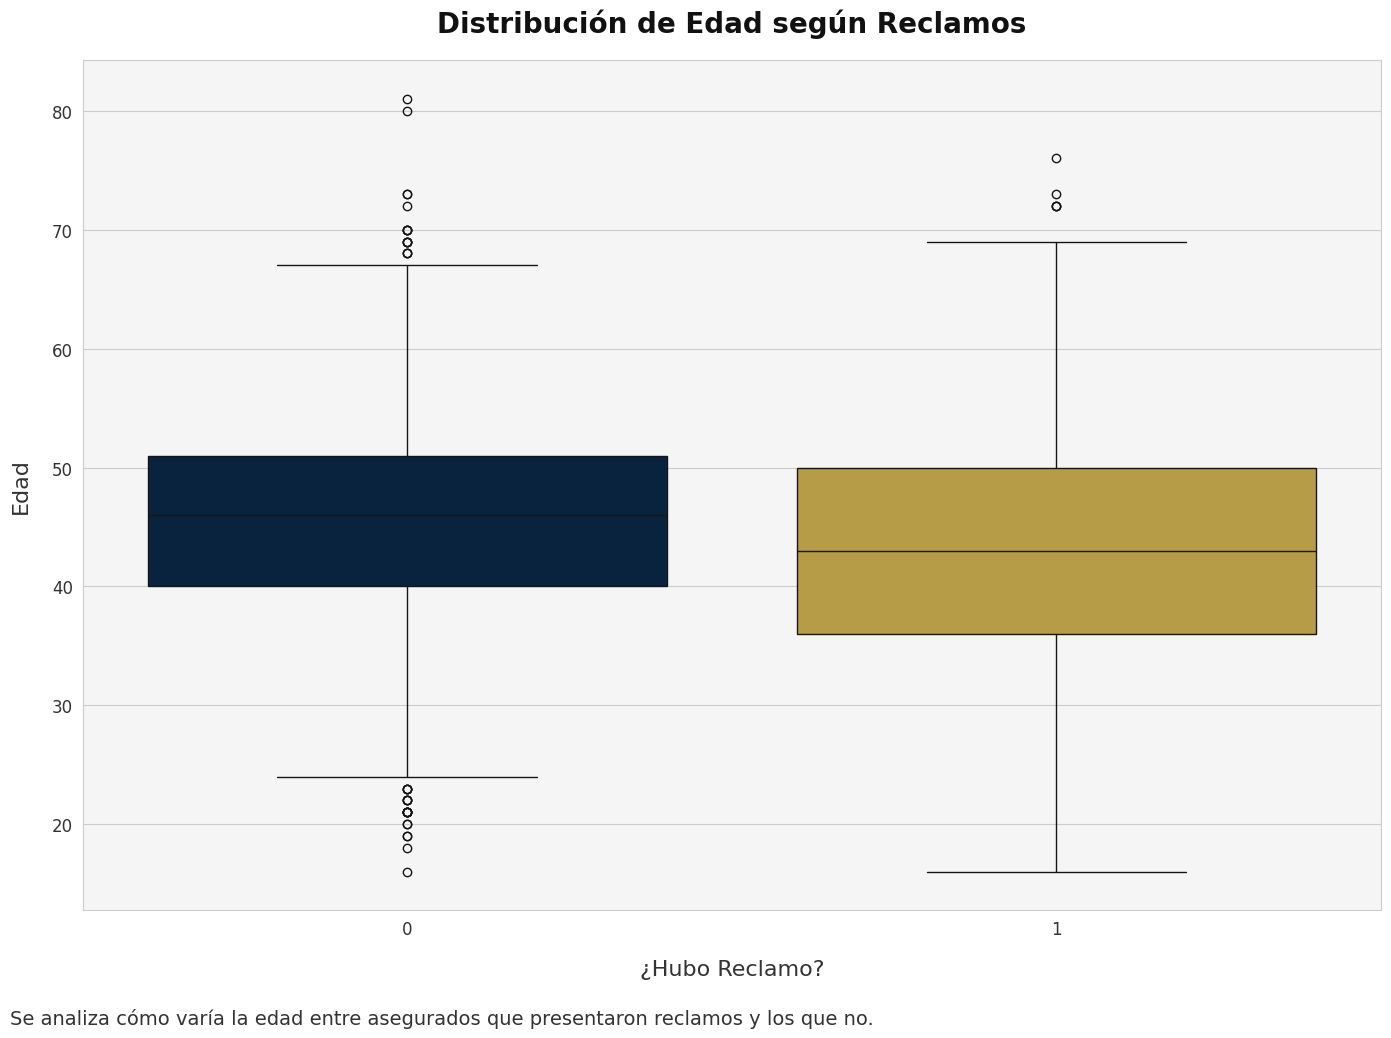

In [42]:
# Configuración general formato base
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Crear figura y eje
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('white')      # Fondo blanco
ax.set_facecolor('#f5f5f5')           # Área del gráfico gris claro

# Paleta de colores UNAM
palette = ['#002147', '#C9A635']  # Azul UNAM y dorado oscuro

# Boxplot CLAIM_FLAG vs AGE
sns.boxplot(
    x='CLAIM_FLAG',
    y='AGE',
    data=df_entrenamiento,
    palette=palette,
    ax=ax
)

# Título y etiquetas
ax.set_title(
    'Distribución de Edad según Reclamos',
    fontsize=20,
    color='#111111',
    fontweight='bold',
    pad=20
)
ax.set_xlabel('¿Hubo Reclamo?', fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel('Edad', fontsize=16, color='#333333', labelpad=15)

# Estilo de ticks
ax.tick_params(axis='x', colors='#333333', labelsize=12, rotation=0)
ax.tick_params(axis='y', colors='#333333', labelsize=12)

# Texto explicativo debajo del gráfico
fig.text(
    0.01, -0.03,
    "Se analiza cómo varía la edad entre asegurados que presentaron reclamos y los que no.",
    fontsize=14,
    color='#333333'
)

# Ajuste layout y mostrar
plt.tight_layout()
plt.show()


In [43]:
# Matriz de correlación
df_entrenamiento.corr()

KIDSDRIV       AGE  HOMEKIDS       YOJ  \
KIDSDRIV                          1.000000 -0.070893  0.460854  0.049194   
AGE                              -0.070893  1.000000 -0.446638  0.144779   
HOMEKIDS                          0.460854 -0.446638  1.000000  0.084662   
YOJ                               0.049194  0.144779  0.084662  1.000000   
INCOME                           -0.041472  0.191496 -0.161008  0.287987   
HOME_VAL                         -0.011532  0.215830 -0.106716  0.272839   
TRAVTIME                          0.009195  0.002263 -0.005178 -0.018414   
BLUEBOOK                         -0.019774  0.171910 -0.104019  0.146841   
TIF                              -0.006084 -0.000341  0.000866  0.029198   
OLDCLAIM                          0.021420 -0.036018  0.031142 -0.001693   
CLM_FREQ                          0.039470 -0.038317  0.038204 -0.021852   
MVR_PTS                           0.052659 -0.079281  0.067590 -0.040207   
CLM_AMT                           0.058283 -0.058105  0.068208 -0.019394   
CAR_AGE                          -0.056155  0.184755 -0.163523  0.060536   
CLAIM_FLAG                        0.100734 -0.115902  0.123819 -0.062851   
PARENT1_Yes                       0.199377 -0.311455  0.445247 -0.037212   
MSTATUS_z_No                     -0.042348 -0.089539 -0.053082 -0.137616   
GENDER_z_F                        0.035531 -0.076393  0.119107 -0.073880   
EDUCATION_Bachelors              -0.010150 -0.008358 -0.024310  0.008367   
EDUCATION_Masters                -0.040508  0.149367 -0.130118  0.071264   
EDUCATION_PhD                    -0.047281  0.165224 -0.106564  0.030876   
EDUCATION_z_High School           0.046347 -0.127227  0.103772 -0.057829   
OCCUPATION_Doctor                -0.039473  0.120894 -0.081554  0.036157   
OCCUPATION_Home Maker             0.004870  0.000629  0.017852 -0.332642   
OCCUPATION_Lawyer                -0.031935  0.140336 -0.102130  0.078343   
OCCUPATION_Manager               -0.023823  0.094635 -0.085379  0.075253   
OCCUPATION_Professional          -0.018493  0.037353 -0.059442  0.080305   
OCCUPATION_Student                0.022336 -0.119711  0.126910 -0.335460   
OCCUPATION_z_Blue Collar          0.040618 -0.064612  0.043357  0.122947   
CAR_USE_Private                   0.004201  0.032109  0.006009 -0.023329   
CAR_TYPE_Panel Truck             -0.013587  0.057620 -0.061452  0.043257   
CAR_TYPE_Pickup                   0.001943 -0.036357 -0.010503 -0.003884   
CAR_TYPE_Sports Car              -0.000700  0.024100  0.043639 -0.058043   
CAR_TYPE_Van                     -0.031683  0.033777 -0.054759  0.038169   
CAR_TYPE_z_SUV                    0.025975 -0.046520  0.082255 -0.058110   
RED_CAR_yes                      -0.032744  0.030747 -0.076320  0.050972   
REVOKED_Yes                       0.027265 -0.048060  0.043735 -0.010608   
URBANICITY_z_Highly Rural/ Rural  0.035473 -0.037275  0.057190 -0.073185   

                                    INCOME  HOME_VAL  TRAVTIME  BLUEBOOK  \
KIDSDRIV                         -0.041472 -0.011532  0.009195 -0.019774   
AGE                               0.191496  0.215830  0.002263  0.171910   
HOMEKIDS                         -0.161008 -0.106716 -0.005178 -0.104019   
YOJ                               0.287987  0.272839 -0.018414  0.146841   
INCOME                            1.000000  0.581959 -0.046438  0.434257   
HOME_VAL                          0.581959  1.000000 -0.028966  0.266800   
TRAVTIME                         -0.046438 -0.028966  1.000000 -0.021091   
BLUEBOOK                          0.434257  0.266800 -0.021091  1.000000   
TIF                               0.003059  0.000931 -0.015652  0.011872   
OLDCLAIM                         -0.033135 -0.053119 -0.017958 -0.030319   
CLM_FREQ                         -0.043903 -0.097804  0.007829 -0.046691   
MVR_PTS                          -0.070171 -0.101782  0.004810 -0.058764   
CLM_AMT                          -0.054994 -0.098096  0.035851  0.001279   
CAR_A

---
## **Correlaciones**
---

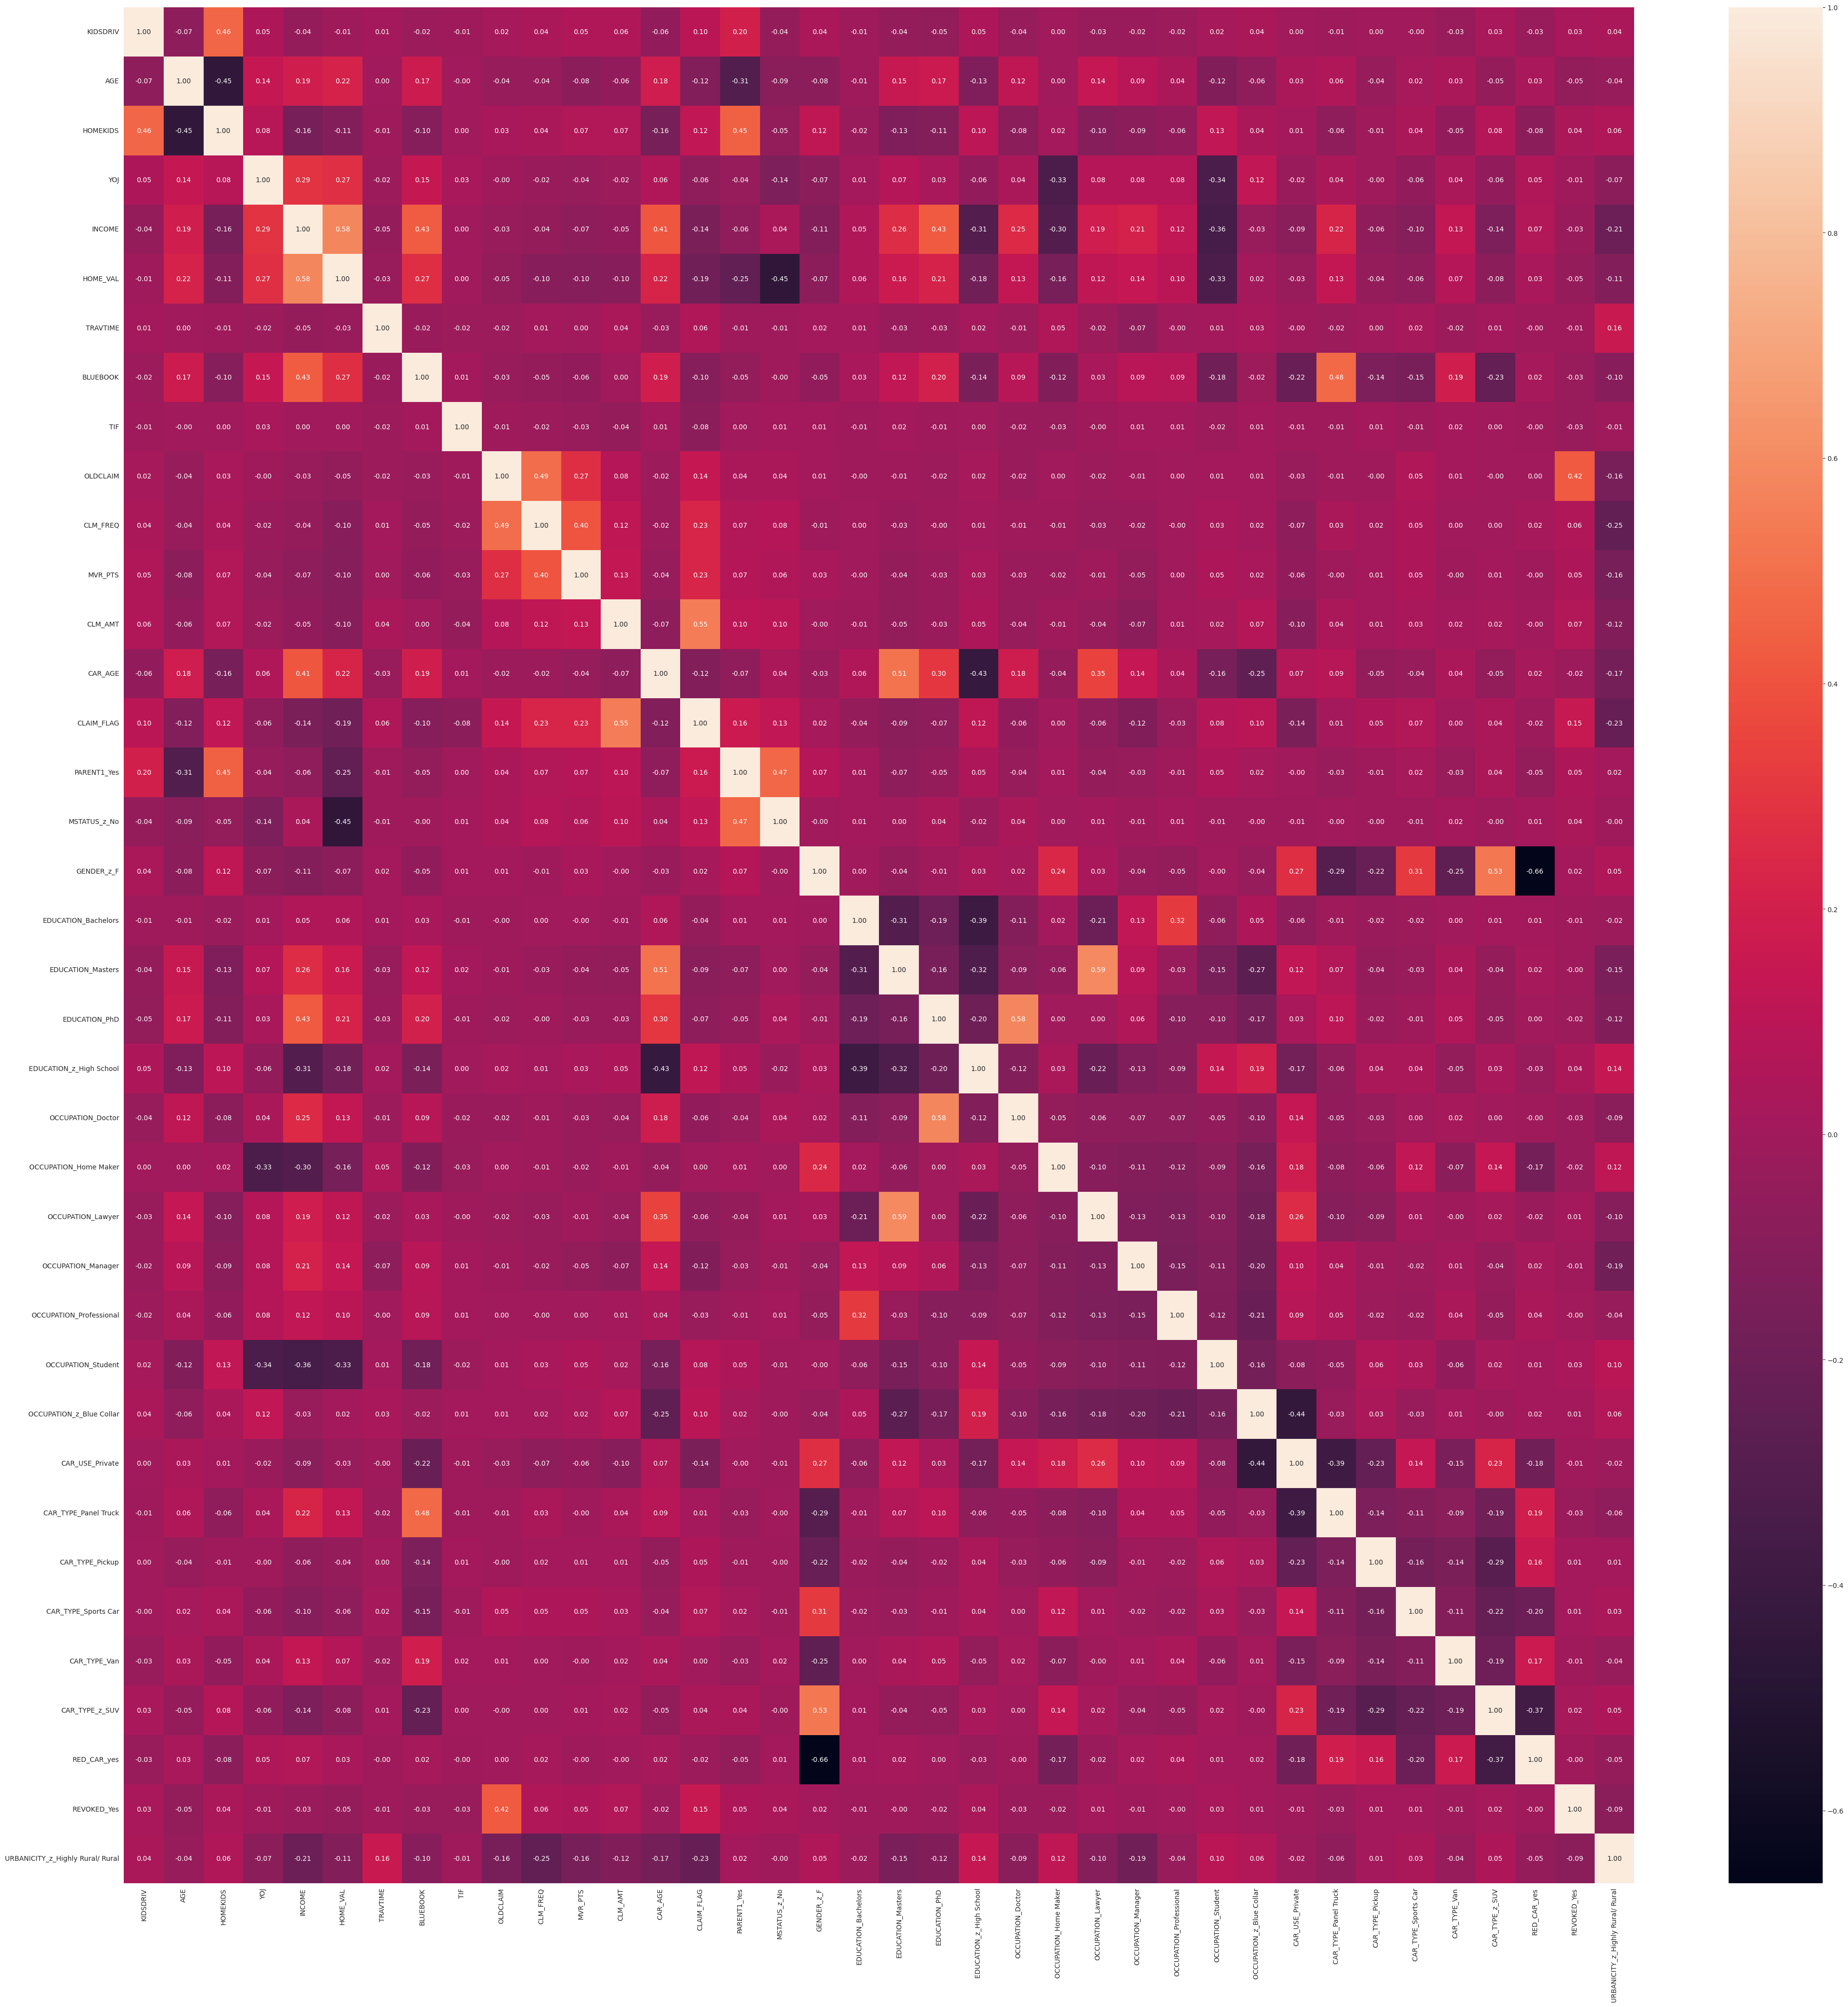

In [44]:
# Grafico de correlación
plt.figure(figsize = (50, 50))
sns.heatmap(df_entrenamiento.corr(), annot = True, fmt = ".2f")
plt.show()

In [45]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_VIF = df_entrenamiento.drop(columns=['CLAIM_FLAG'])
df_VIF


KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME  HOME_VAL  TRAVTIME  BLUEBOOK  \
0             0  60.0         0  11.0   67349.0       0.0        14     14230   
1             0  43.0         0  11.0   91449.0  257252.0        22     14940   
2             0  48.0         0  11.0   52881.0       0.0        26     21970   
3             0  35.0         1  10.0   16039.0  124191.0         5      4010   
6             0  34.0         1  12.0  125301.0       0.0        46     17430   
...         ...   ...       ...   ...       ...       ...       ...       ...   
10297         1  45.0         2   9.0  164669.0  386273.0        21     13270   
10298         0  46.0         0   9.0  107204.0  332591.0        36     24490   
10299         0  48.0         0  15.0   39837.0  170611.0        12     13820   
10300         0  50.0         0   7.0   43445.0  149248.0        36     22550   
10301         0  52.0         0  11.0   53235.0  197017.0        64     19400   

       TIF  OLDCLAIM  ...  OCCUPATION_z_Blue Collar  CAR_USE_Private  \
0       11      4461  ...                         0                1   
1        1         0  ...                         1                0   
2        1         0  ...                         0                1   
3        4     38690  ...                         0                1   
6        1         0  ...                         1                0   
...    ...       ...  ...                       ...              ...   
10297   15         0  ...                         0                1   
10298    6         0  ...                         0                0   
10299    7         0  ...                         1                1   
10300    6         0  ...                         0                1   
10301    6         0  ...                         0                1   

       CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_Sports Car  \
0                         0                0                    0   
1                         0                0                    0   
2                         0                0                    0   
3                         0                0                    0   
6                         0                0                    1   
...                     ...              ...                  ...   
10297                     0                0                    0   
10298                     1                0                    0   
10299                     0                0                    0   
10300                     0                0                    0   
10301                     0                0                    0   

       CAR_TYPE_Van  CAR_TYPE_z_SUV  RED_CAR_yes  REVOKED_Yes  \
0                 0               0            1            0   
1                 0               0            1            0   
2                 1               0            1            0   
3                 0               1            0            0   
6                 0               0            0            0   
...             ...             ...          ...          ...   
10297             0               0            0            0   
10298             0               0            0            0   
10299             0               1            0            0   
10300             0               0            0            0   
10301             0               0            0            0   

       URBANICITY_z_Highly Rural/ Rural  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
6                                     0  
...                                 ...  
10297                                 0  
10298                                 0  
10299                                 0  
10300                                 0  
10301                                 1  

[8163 rows x 37 columns]

In [46]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_VIF.columns
vif_data["VIF"] = [variance_inflation_factor(df_VIF.values, i) for i in range(df_VIF.shape[1])]
vif_data

feature        VIF
0                           KIDSDRIV   1.447524
1                                AGE  27.415102
2                           HOMEKIDS   2.745914
3                                YOJ  10.626297
4                             INCOME   8.349895
5                           HOME_VAL   5.859362
6                           TRAVTIME   5.464829
7                           BLUEBOOK   8.963893
8                                TIF   2.660673
9                           OLDCLAIM   2.039022
10                          CLM_FREQ   2.370525
11                           MVR_PTS   1.997095
12                           CLM_AMT   1.199874
13                           CAR_AGE   6.490768
14                       PARENT1_Yes   2.111036
15                      MSTATUS_z_No   3.396296
16                        GENDER_z_F   6.869681
17               EDUCATION_Bachelors   4.305268
18                 EDUCATION_Masters   5.996697
19                     EDUCATION_PhD   4.055411
20           EDUCATION_z_High School   3.087982
21                 OCCUPATION_Doctor   1.811992
22             OCCUPATION_Home Maker   1.829440
23                 OCCUPATION_Lawyer   2.476838
24                OCCUPATION_Manager   1.924368
25           OCCUPATION_Professional   1.979454
26                OCCUPATION_Student   1.702370
27          OCCUPATION_z_Blue Collar   2.588985
28                   CAR_USE_Private   5.605003
29              CAR_TYPE_Panel Truck   2.340477
30                   CAR_TYPE_Pickup   1.798710
31               CAR_TYPE_Sports Car   2.094325
32                      CAR_TYPE_Van   1.543329
33                    CAR_TYPE_z_SUV   3.493228
34                       RED_CAR_yes   2.422018
35                       REVOKED_Yes   1.464153
36  URBANICITY_z_Highly Rural/ Rural   1.575296

In [47]:
#Clasificamos las variables según su VIF
vif_menor_5 = vif_data[vif_data["VIF"] < 5]
vif_entre_5_10 = vif_data[(vif_data["VIF"] >= 5) & (vif_data["VIF"] <= 10)]
vif_mayor_10 = vif_data[vif_data["VIF"] > 10]

In [48]:
print("Variables con VIF < 5:")
print(vif_menor_5)

print("\nVariables con 5 <= VIF <= 10:")
print(vif_entre_5_10)

print("\nVariables con VIF > 10:")
print(vif_mayor_10)

Variables con VIF < 5:
                             feature       VIF
0                           KIDSDRIV  1.447524
2                           HOMEKIDS  2.745914
8                                TIF  2.660673
9                           OLDCLAIM  2.039022
10                          CLM_FREQ  2.370525
11                           MVR_PTS  1.997095
12                           CLM_AMT  1.199874
14                       PARENT1_Yes  2.111036
15                      MSTATUS_z_No  3.396296
17               EDUCATION_Bachelors  4.305268
19                     EDUCATION_PhD  4.055411
20           EDUCATION_z_High School  3.087982
21                 OCCUPATION_Doctor  1.811992
22             OCCUPATION_Home Maker  1.829440
23                 OCCUPATION_Lawyer  2.476838
24                OCCUPATION_Manager  1.924368
25           OCCUPATION_Professional  1.979454
26                OCCUPATION_Student  1.702370
27          OCCUPATION_z_Blue Collar  2.588985
29              CAR_TYPE_Panel Truck 

In [49]:
# Eliminamos las variables
columnas_a_eliminar = ['AGE', 'YOJ', 'BLUEBOOK', 'INCOME', 'CAR_AGE','GENDER_z_F', 'HOME_VAL', 'TRAVTIME', 'EDUCATION_Masters', 'CAR_USE_Private','HOMEKIDS',
                      'OLDCLAIM','CLM_FREQ','CLM_AMT','EDUCATION_Bachelors',
                       'EDUCATION_PhD','EDUCATION_z_High School']
df_entrenamiento = df_entrenamiento.drop(columnas_a_eliminar, axis=1)
df_entrenamiento

KIDSDRIV  TIF  MVR_PTS  CLAIM_FLAG  PARENT1_Yes  MSTATUS_z_No  \
0             0   11        3           0            0             1   
1             0    1        0           0            0             1   
2             0    1        2           0            0             1   
3             0    4        3           0            0             0   
6             0    1        0           1            1             1   
...         ...  ...      ...         ...          ...           ...   
10297         1   15        2           0            0             0   
10298         0    6        0           0            0             0   
10299         0    7        0           0            0             0   
10300         0    6        0           0            0             0   
10301         0    6        0           0            0             0   

       OCCUPATION_Doctor  OCCUPATION_Home Maker  OCCUPATION_Lawyer  \
0                      0                      0                  0   
1                      0                      0                  0   
2                      0                      0                  0   
3                      0                      0                  0   
6                      0                      0                  0   
...                  ...                    ...                ...   
10297                  0                      0                  0   
10298                  0                      0                  0   
10299                  0                      0                  0   
10300                  0                      1                  0   
10301                  0                      0                  0   

       OCCUPATION_Manager  ...  OCCUPATION_Student  OCCUPATION_z_Blue Collar  \
0                       0  ...                   0                         0   
1                       0  ...                   0                         1   
2                       1  ...                   0                         0   
3                       0  ...                   0                         0   
6                       0  ...                   0                         1   
...                   ...  ...                 ...                       ...   
10297                   1  ...                   0                         0   
10298                   0  ...                   0                         0   
10299                   0  ...                   0                         1   
10300                   0  ...                   0                         0   
10301                   0  ...                   0                         0   

       CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_Sports Car  \
0                         0                0                    0   
1                         0                0                    0   
2                         0                0                    0   
3                         0                0                    0   
6                         0                0                    1   
...                     ...              ...                  ...   
10297                     0                0                    0   
10298                     1                0                    0   
10299                     0                0                    0   
10300                     0                0                    0   
10301                     0                0                    0   

       CAR_TYPE_Van  CAR_TYPE_z_SUV  RED_CAR_yes  REVOKED_Yes  \
0                 0               0            1            0   
1                 0               0            1            0   
2                 1               0            1            0   
3                 0               1            0            0   
6                 0               0            0            0   
...             ...             ...          ...          ...   
10297             0               0            0        

In [50]:
df_entrenamiento = df_entrenamiento.astype(float)

In [51]:
df_entrenamiento

KIDSDRIV   TIF  MVR_PTS  CLAIM_FLAG  PARENT1_Yes  MSTATUS_z_No  \
0           0.0  11.0      3.0         0.0          0.0           1.0   
1           0.0   1.0      0.0         0.0          0.0           1.0   
2           0.0   1.0      2.0         0.0          0.0           1.0   
3           0.0   4.0      3.0         0.0          0.0           0.0   
6           0.0   1.0      0.0         1.0          1.0           1.0   
...         ...   ...      ...         ...          ...           ...   
10297       1.0  15.0      2.0         0.0          0.0           0.0   
10298       0.0   6.0      0.0         0.0          0.0           0.0   
10299       0.0   7.0      0.0         0.0          0.0           0.0   
10300       0.0   6.0      0.0         0.0          0.0           0.0   
10301       0.0   6.0      0.0         0.0          0.0           0.0   

       OCCUPATION_Doctor  OCCUPATION_Home Maker  OCCUPATION_Lawyer  \
0                    0.0                    0.0                0.0   
1                    0.0                    0.0                0.0   
2                    0.0                    0.0                0.0   
3                    0.0                    0.0                0.0   
6                    0.0                    0.0                0.0   
...                  ...                    ...                ...   
10297                0.0                    0.0                0.0   
10298                0.0                    0.0                0.0   
10299                0.0                    0.0                0.0   
10300                0.0                    1.0                0.0   
10301                0.0                    0.0                0.0   

       OCCUPATION_Manager  ...  OCCUPATION_Student  OCCUPATION_z_Blue Collar  \
0                     0.0  ...                 0.0                       0.0   
1                     0.0  ...                 0.0                       1.0   
2                     1.0  ...                 0.0                       0.0   
3                     0.0  ...                 0.0                       0.0   
6                     0.0  ...                 0.0                       1.0   
...                   ...  ...                 ...                       ...   
10297                 1.0  ...                 0.0                       0.0   
10298                 0.0  ...                 0.0                       0.0   
10299                 0.0  ...                 0.0                       1.0   
10300                 0.0  ...                 0.0                       0.0   
10301                 0.0  ...                 0.0                       0.0   

       CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_Sports Car  \
0                       0.0              0.0                  0.0   
1                       0.0              0.0                  0.0   
2                       0.0              0.0                  0.0   
3                       0.0              0.0                  0.0   
6                       0.0              0.0                  1.0   
...                     ...              ...                  ...   
10297                   0.0              0.0                  0.0   
10298                   1.0              0.0                  0.0   
10299                   0.0              0.0                  0.0   
10300                   0.0              0.0                  0.0   
10301                   0.0              0.0                  0.0   

       CAR_TYPE_Van  CAR_TYPE_z_SUV  RED_CAR_yes  REVOKED_Yes  \
0               0.0             0.0          1.0          0.0   
1               0.0             0.0          1.0          0.0   
2               1.0             0.0          1.0          0.0   
3               0.0             1.0          0.0          0.0   
6               0.0             0.0          0.0          0.0   
...             ...             ...          ...          ...   
10297           0.0             0.0         

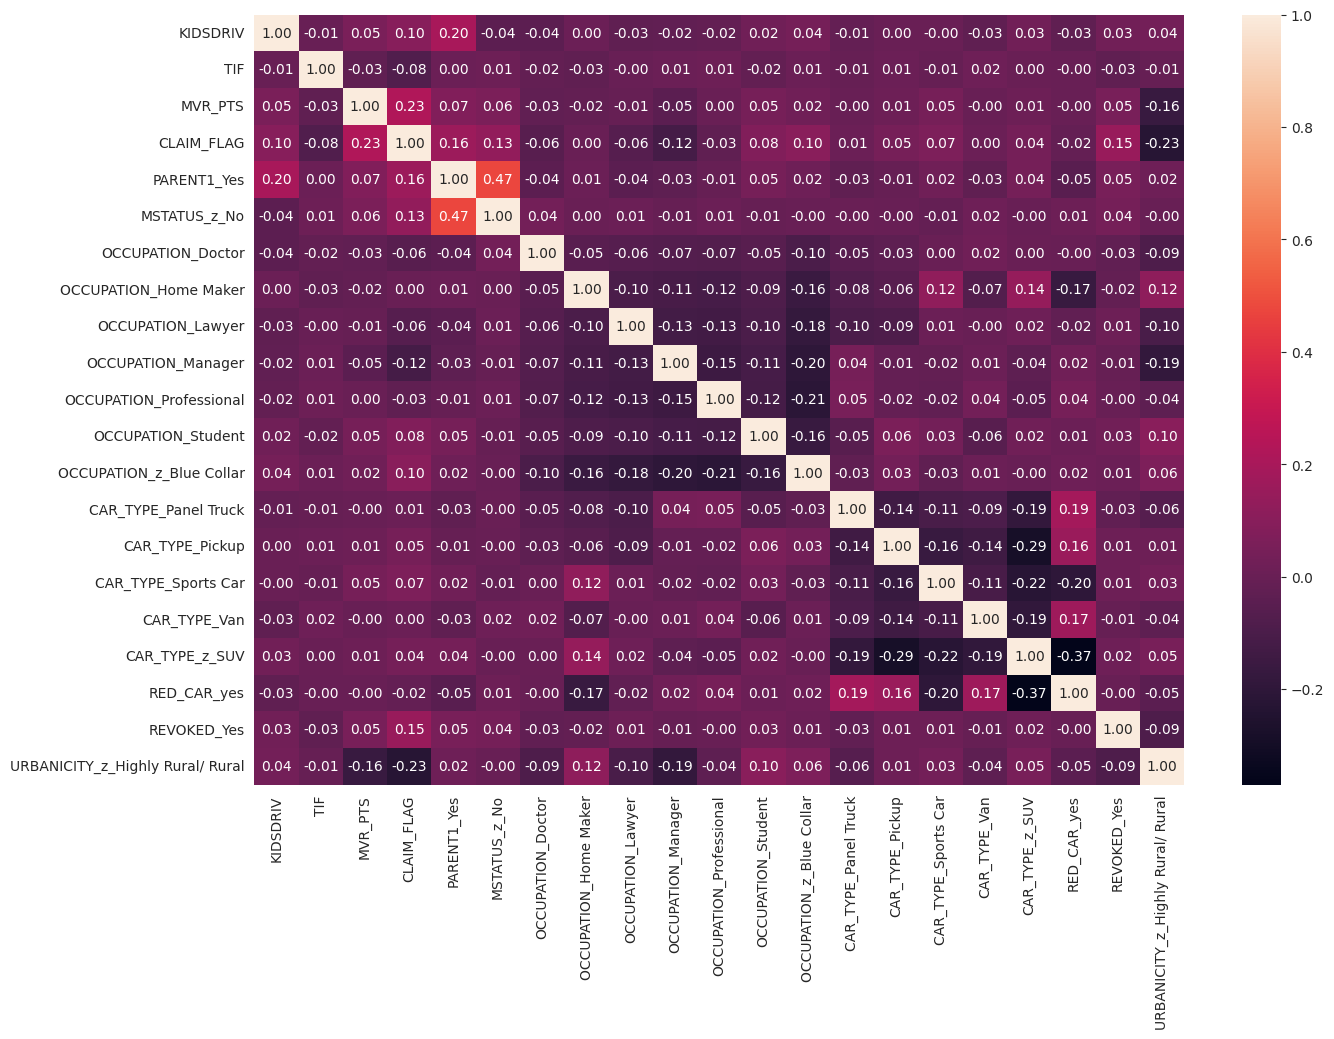

In [52]:
# Grafico de correlación
plt.figure(figsize = (15, 10))
sns.heatmap(df_entrenamiento.corr(), annot = True, fmt = ".2f")
plt.show()

 ---
# **Regresión Logística**
 ---

---
## **Oversampling**
---

In [53]:
X = df_entrenamiento.loc[:, df_entrenamiento.columns != "CLAIM_FLAG"]
Y = df_entrenamiento["CLAIM_FLAG"]

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

In [54]:
print(X.shape, Y.shape)

(8163, 20) (8163,)


In [55]:
print(X_train.shape, Y_train.shape)

(5714, 20) (5714,)


In [56]:
os_data_X, os_data_Y = os.fit_resample(X_train, Y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_Y = pd.DataFrame(data = os_data_Y, columns = ["CLAIM_FLAG"])

In [57]:
os_data_X.shape

(8358, 20)

In [58]:
os_data_Y.value_counts()

CLAIM_FLAG
0.0           4179
1.0           4179
Name: count, dtype: int64

In [59]:
df_entrenamiento_variables = df_entrenamiento.columns.values.tolist()
Y = ["CLAIM_FLAG"]
X = [i for i in df_entrenamiento_variables if i not in Y]

In [60]:
print(Y, X)

['CLAIM_FLAG'] ['KIDSDRIV', 'TIF', 'MVR_PTS', 'PARENT1_Yes', 'MSTATUS_z_No', 'OCCUPATION_Doctor', 'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager', 'OCCUPATION_Professional', 'OCCUPATION_Student', 'OCCUPATION_z_Blue Collar', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'CAR_TYPE_z_SUV', 'RED_CAR_yes', 'REVOKED_Yes', 'URBANICITY_z_Highly Rural/ Rural']


In [61]:
X = os_data_X
Y = os_data_Y

In [62]:
import statsmodels.api as sm

In [63]:
# Se agregó manualmente un término constante a la matriz de variables independientes utilizando
# sm.add_constant(X) con el objetivo de incluir un intercepto en el modelo de regresión logística.
# La presencia del intercepto es fundamental, ya que permite que el modelo estime una probabilidad
# base del evento de interés cuando todas las variables predictoras toman el valor de cero.
X_m = sm.add_constant(X)

In [64]:
X_m.corr()

const  KIDSDRIV       TIF   MVR_PTS  \
const                               NaN       NaN       NaN       NaN   
KIDSDRIV                            NaN  1.000000 -0.022228  0.063389   
TIF                                 NaN -0.022228  1.000000 -0.034291   
MVR_PTS                             NaN  0.063389 -0.034291  1.000000   
PARENT1_Yes                         NaN  0.231743 -0.010999  0.076360   
MSTATUS_z_No                        NaN -0.023154  0.014728  0.050544   
OCCUPATION_Doctor                   NaN -0.029733 -0.010921 -0.024827   
OCCUPATION_Home Maker               NaN  0.005063 -0.036680 -0.033283   
OCCUPATION_Lawyer                   NaN -0.018655  0.017456 -0.037636   
OCCUPATION_Manager                  NaN -0.009557  0.008627 -0.067722   
OCCUPATION_Professional             NaN -0.014436  0.021917  0.002426   
OCCUPATION_Student                  NaN  0.007739 -0.036542  0.039673   
OCCUPATION_z_Blue Collar            NaN  0.007778  0.005111  0.064152   
CAR_TYPE_Panel Truck                NaN -0.012408 -0.010502 -0.002643   
CAR_TYPE_Pickup                     NaN -0.022990 -0.009625  0.034285   
CAR_TYPE_Sports Car                 NaN -0.006938 -0.006817  0.022021   
CAR_TYPE_Van                        NaN -0.053148  0.012318 -0.014369   
CAR_TYPE_z_SUV                      NaN  0.062330  0.021591  0.010279   
RED_CAR_yes                         NaN -0.075512 -0.006470  0.017503   
REVOKED_Yes                         NaN  0.035939 -0.037539  0.038526   
URBANICITY_z_Highly Rural/ Rural    NaN  0.025347  0.007811 -0.154634   

                                  PARENT1_Yes  MSTATUS_z_No  \
const                                     NaN           NaN   
KIDSDRIV                             0.231743     -0.023154   
TIF                                 -0.010999      0.014728   
MVR_PTS                              0.076360      0.050544   
PARENT1_Yes                          1.000000      0.504630   
MSTATUS_z_No                         0.504630      1.000000   
OCCUPATION_Doctor                   -0.032204      0.039319   
OCCUPATION_Home Maker                0.000500     -0.007269   
OCCUPATION_Lawyer                   -0.042843      0.003136   
OCCUPATION_Manager                  -0.034461     -0.014463   
OCCUPATION_Professional             -0.023927      0.002652   
OCCUPATION_Student                   0.040118     -0.027143   
OCCUPATION_z_Blue Collar             0.006000      0.016692   
CAR_TYPE_Panel Truck                -0.026038      0.010627   
CAR_TYPE_Pickup                     -0.033194     -0.007004   
CAR_TYPE_Sports Car                  0.020670     -0.019305   
CAR_TYPE_Van                        -0.053214      0.009276   
CAR_TYPE_z_SUV                       0.051315     -0.014930   
RED_CAR_yes                         -0.062917      0.026514   
REVOKED_Yes                          0.031405      0.048037   
URBANICITY_z_Highly Rural/ Rural    -0.018546     -0.033244   

                                  OCCUPATION_Doctor  OCCUPATION_Home Maker  \
const                                           NaN                    NaN   
KIDSDRIV                                  -0.029733               0.005063   
TIF                                       -0.010921              -0.036680   
MVR_PTS                                   -0.024827              -0.033283   
PARENT1_Yes                               -0.032204               0.000500   
MSTATUS_z_No                               0.039319              -0.007269   
OCCUPATION_Doctor                          1.000000              -0.044885   
OCCUPATION_Home Maker                     -0.044885               1.000000   
OCCUPATION_Lawyer                         -0.051460              -0.094579   
OCCUPATION_Manager                        -0.054598              -0.100097   
OCCUPATION_Professional                   -0.061975              -0.114905   
OCCUPATION_Student                        -0.051174              -0.094531   
OCCUPATION_z_Blue Collar  

In [65]:
log_reg = sm.Logit(Y, X_m).fit()

Optimization terminated successfully.
         Current function value: 0.541523
         Iterations 6


In [66]:
print(log_reg.summary2())

                                 Results: Logit
Model:                     Logit                 Method:                MLE      
Dependent Variable:        CLAIM_FLAG            Pseudo R-squared:      0.219    
Date:                      2025-06-04 15:06      AIC:                   9094.0942
No. Observations:          8358                  BIC:                   9241.7446
Df Model:                  20                    Log-Likelihood:        -4526.0  
Df Residuals:              8337                  LL-Null:               -5793.3  
Converged:                 1.0000                LLR p-value:           0.0000   
No. Iterations:            6.0000                Scale:                 1.0000   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -0.2976   0.0952 

In [67]:
X.head()

KIDSDRIV  TIF  MVR_PTS  PARENT1_Yes  MSTATUS_z_No  OCCUPATION_Doctor  \
0       0.0  4.0      0.0          0.0           1.0                0.0   
1       0.0  1.0      1.0          0.0           0.0                0.0   
2       0.0  7.0      0.0          0.0           0.0                0.0   
3       0.0  6.0      4.0          0.0           0.0                0.0   
4       0.0  3.0      0.0          0.0           1.0                0.0   

   OCCUPATION_Home Maker  OCCUPATION_Lawyer  OCCUPATION_Manager  \
0                    0.0                0.0                 0.0   
1                    1.0                0.0                 0.0   
2                    0.0                1.0                 0.0   
3                    0.0                0.0                 0.0   
4                    0.0                0.0                 1.0   

   OCCUPATION_Professional  OCCUPATION_Student  OCCUPATION_z_Blue Collar  \
0                      1.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_Sports Car  CAR_TYPE_Van  \
0                   0.0              0.0                  0.0           0.0   
1                   0.0              0.0                  1.0           0.0   
2                   0.0              0.0                  0.0           0.0   
3                   0.0              1.0                  0.0           0.0   
4                   1.0              0.0                  0.0           0.0   

   CAR_TYPE_z_SUV  RED_CAR_yes  REVOKED_Yes  URBANICITY_z_Highly Rural/ Rural  
0             1.0          0.0          0.0                               0.0  
1             0.0          0.0          0.0                               0.0  
2             1.0          0.0          0.0                               0.0  
3             0.0          1.0          0.0                               0.0  
4             0.0          0.0          0.0                               0.0

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 45)

In [69]:
X_train

KIDSDRIV   TIF   MVR_PTS  PARENT1_Yes  MSTATUS_z_No  OCCUPATION_Doctor  \
710        0.0  10.0  4.000000          0.0      0.000000                0.0   
8064       0.0  13.0  3.342458          0.0      0.000000                0.0   
8259       1.0  10.0  0.000000          0.0      0.000000                0.0   
7580       0.0   6.0  1.000000          0.0      0.000000                0.0   
5084       0.0   4.0  0.000000          1.0      1.000000                0.0   
...        ...   ...       ...          ...           ...                ...   
3704       0.0  10.0  0.000000          0.0      1.000000                0.0   
163        0.0   7.0  6.000000          0.0      0.000000                0.0   
6012       0.0   4.0  4.000000          0.0      1.000000                0.0   
6558       0.0  13.0  6.798995          0.0      0.798995                0.0   
7115       0.0   4.0  5.327411          0.0      0.000000                0.0   

      OCCUPATION_Home Maker  OCCUPATION_Lawyer  OCCUPATION_Manager  \
710                0.000000           0.000000                 0.0   
8064               0.000000           0.342458                 0.0   
8259               0.000000           0.000000                 0.0   
7580               1.000000           0.000000                 0.0   
5084               0.000000           0.000000                 0.0   
...                     ...                ...                 ...   
3704               0.000000           0.000000                 0.0   
163                0.000000           0.000000                 0.0   
6012               0.000000           0.000000                 0.0   
6558               0.201005           0.000000                 0.0   
7115               0.000000           0.000000                 0.0   

      OCCUPATION_Professional  OCCUPATION_Student  OCCUPATION_z_Blue Collar  \
710                       0.0                 0.0                  0.000000   
8064                      0.0                 0.0                  0.657542   
8259                      1.0                 0.0                  0.000000   
7580                      0.0                 0.0                  0.000000   
5084                      0.0                 1.0                  0.000000   
...                       ...                 ...                       ...   
3704                      0.0                 1.0                  0.000000   
163                       1.0                 0.0                  0.000000   
6012                      0.0                 0.0                  1.000000   
6558                      0.0                 0.0                  0.798995   
7115                      0.0                 1.0                  0.000000   

      CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_Sports Car  \
710               1.000000              0.0             0.000000   
8064              0.000000              0.0             1.000000   
8259              0.847457              0.0             0.000000   
7580              0.000000              0.0             0.000000   
5084              0.000000              1.0             0.000000   
...                    ...              ...                  ...   
3704              0.000000              0.0             0.000000   
163               0.000000              0.0             0.000000   
6012              0.000000              1.0             0.000000   
6558              0.000000              0.0             0.000000   
7115              0.000000              0.0             0.327411   

      CAR_TYPE_Van  CAR_TYPE_z_SUV  RED_CAR_yes  REVOKED_Yes  \
710            0.0        0.000000     1.000000     0.000000   
8064           0.0        0.000000     0.000000     0.342458   
8259           0.0        0.152543     0.847457     0.000000   
7580           0.0        1.000000     0.000000     0.000000   
5084           0.0        0.000000     1.000000     0.000000   
...            ...             ...          ...       

In [70]:
X_train.shape

(5850, 20)

In [71]:
X_test

KIDSDRIV   TIF  MVR_PTS  PARENT1_Yes  MSTATUS_z_No  OCCUPATION_Doctor  \
3845       0.0  13.0      3.0          0.0           0.0                0.0   
7156       0.0   4.0      0.0          0.0           1.0                0.0   
2312       0.0   1.0      0.0          0.0           0.0                0.0   
1026       0.0   6.0      1.0          0.0           0.0                0.0   
3852       0.0   3.0      0.0          0.0           1.0                0.0   
...        ...   ...      ...          ...           ...                ...   
547        0.0   7.0      0.0          0.0           1.0                0.0   
2257       1.0   1.0      0.0          1.0           1.0                0.0   
1962       0.0  10.0      2.0          0.0           1.0                0.0   
5766       0.0   6.0      6.0          0.0           1.0                0.0   
2507       0.0  13.0      0.0          0.0           0.0                0.0   

      OCCUPATION_Home Maker  OCCUPATION_Lawyer  OCCUPATION_Manager  \
3845                    0.0                0.0            0.000000   
7156                    0.0                0.0            0.611411   
2312                    0.0                0.0            0.000000   
1026                    0.0                0.0            0.000000   
3852                    0.0                1.0            0.000000   
...                     ...                ...                 ...   
547                     0.0                0.0            1.000000   
2257                    1.0                0.0            0.000000   
1962                    0.0                0.0            0.000000   
5766                    0.0                0.0            0.000000   
2507                    1.0                0.0            0.000000   

      OCCUPATION_Professional  OCCUPATION_Student  OCCUPATION_z_Blue Collar  \
3845                      0.0                 0.0                       1.0   
7156                      0.0                 0.0                       0.0   
2312                      0.0                 0.0                       1.0   
1026                      0.0                 0.0                       1.0   
3852                      0.0                 0.0                       0.0   
...                       ...                 ...                       ...   
547                       0.0                 0.0                       0.0   
2257                      0.0                 0.0                       0.0   
1962                      0.0                 0.0                       1.0   
5766                      1.0                 0.0                       0.0   
2507                      0.0                 0.0                       0.0   

      CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_Sports Car  \
3845                   0.0         0.000000                  0.0   
7156                   0.0         0.000000                  0.0   
2312                   0.0         1.000000                  0.0   
1026                   0.0         0.000000                  0.0   
3852                   0.0         0.000000                  0.0   
...                    ...              ...                  ...   
547                    0.0         0.000000                  0.0   
2257                   0.0         0.000000                  0.0   
1962                   0.0         0.000000                  0.0   
5766                   0.0         0.230953                  0.0   
2507                   0.0         0.000000                  0.0   

      CAR_TYPE_Van  CAR_TYPE_z_SUV  RED_CAR_yes  REVOKED_Yes  \
3845      1.000000             0.0          0.0          1.0   
7156      0.388589             0.0          1.0          0.0   
2312      0.000000             0.0          0.0          0.0   
1026      0.000000             0.0          1.0          0.0   
3852      0.000000             0.0          0.0          0.0   
...            ...             ...          ...          ...   
54

In [72]:
X_test.shape

(2508, 20)

In [73]:
Y_test

CLAIM_FLAG
3845         1.0
7156         1.0
2312         1.0
1026         0.0
3852         0.0
...          ...
547          0.0
2257         1.0
1962         0.0
5766         1.0
2507         0.0

[2508 rows x 1 columns]

In [74]:
Y_train

CLAIM_FLAG
710          0.0
8064         1.0
8259         1.0
7580         1.0
5084         1.0
...          ...
3704         0.0
163          0.0
6012         1.0
6558         1.0
7115         1.0

[5850 rows x 1 columns]

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [76]:
predicciones = model.predict(X_test)
predicciones

array([1., 0., 1., ..., 0., 1., 0.])

In [77]:
model.predict_proba(X_test)[:,1]

array([0.65418575, 0.33131682, 0.58242326, ..., 0.47664771, 0.6524558 ,
       0.17359944])

In [78]:
predicciones.shape

(2508,)

In [79]:
Y_test

CLAIM_FLAG
3845         1.0
7156         1.0
2312         1.0
1026         0.0
3852         0.0
...          ...
547          0.0
2257         1.0
1962         0.0
5766         1.0
2507         0.0

[2508 rows x 1 columns]

In [80]:
Y_test.shape

(2508, 1)

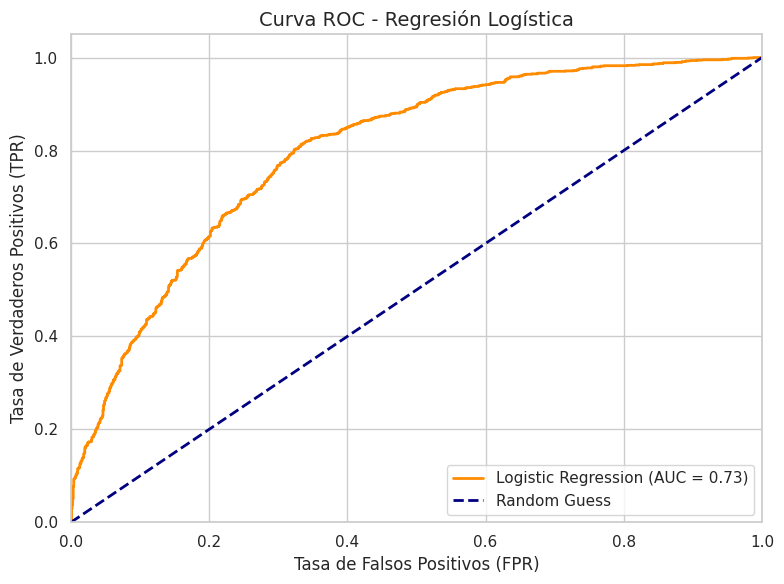

In [81]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular AUC y curva ROC
logit_roc_auc = roc_auc_score(Y_test, model.predict(X_test))
fpr_lr, tpr_lr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])

# Estilo Seaborn
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2,
         label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

# Límites y etiquetas
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - Regresión Logística', fontsize=14)
plt.legend(loc="lower right")
plt.tight_layout()

# Guardar y mostrar
plt.savefig('Log_ROC_Improved.png')
plt.show()


La curva ROC obtenida para el modelo de Regresión Logística muestra un área bajo la curva (AUC) de 0.73, lo que indica una buena capacidad del modelo para discriminar entre clases positivas y negativas. Cuanto más se acerque esta curva a la esquina superior izquierda, mejor será el desempeño del modelo. En este caso, la curva se aleja visiblemente de la diagonal (representando una clasificación aleatoria), lo que sugiere que el modelo tiene un rendimiento superior al azar en la tarea de clasificación.



In [82]:
fpr_lr

array([0.        , 0.        , 0.        , ..., 0.98644338, 0.98724083,
       1.        ])

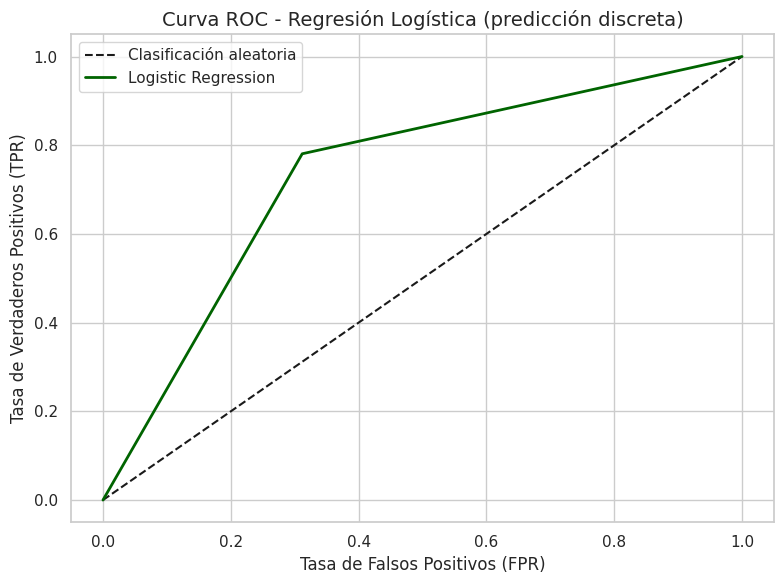

In [83]:
# Obtener curva ROC a partir de predicciones discretas (0 o 1)
fpr_lr, tpr_lr, _ = roc_curve(Y_test, predicciones)

# Estilo Seaborn
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Clasificación aleatoria')
plt.plot(fpr_lr, tpr_lr, color='darkgreen', lw=2, label='Logistic Regression')
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - Regresión Logística (predicción discreta)', fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

La curva ROC construida a partir de las predicciones discretas (clases 0 y 1) del modelo de Regresión Logística muestra la relación entre la tasa de verdaderos positivos y la de falsos positivos. Aunque este enfoque puede limitar la suavidad de la curva (ya que no considera las probabilidades), la forma de la curva sigue indicando una capacidad razonable del modelo para distinguir entre clases. Si la curva se encuentra por encima de la diagonal aleatoria, como en este caso, el modelo tiene un rendimiento mejor que una clasificación al azar.

In [84]:
fpr_lr

array([0.        , 0.31180223, 1.        ])

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(Y_test,predicciones))

              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      1254
         1.0       0.71      0.78      0.75      1254

    accuracy                           0.73      2508
   macro avg       0.74      0.73      0.73      2508
weighted avg       0.74      0.73      0.73      2508



El modelo de Regresión Logística alcanzó una exactitud del 73%. Para la clase 1.0, que podría representar la clase positiva (por ejemplo, ocurrencia de un evento), se logró un recall de 0.78, indicando que el modelo identifica correctamente el 78% de los verdaderos positivos, lo cual es útil cuando es importante minimizar los falsos negativos. Por otro lado, la clase 0.0 obtuvo una mayor precisión (0.76), sugiriendo que cuando el modelo predice la clase 0, es correcto en un 76% de los casos. El equilibrio entre precisión y recall se refleja en los valores de F1-score, que son 0.72 para la clase 0 y 0.75 para la clase 1.



In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predicciones)

array([[863, 391],
       [275, 979]])

In [88]:
import statsmodels.api as sm
import pandas as pd
Y_test.head()

CLAIM_FLAG
3845         1.0
7156         1.0
2312         1.0
1026         0.0
3852         0.0

In [89]:
X_test.head()

KIDSDRIV   TIF  MVR_PTS  PARENT1_Yes  MSTATUS_z_No  OCCUPATION_Doctor  \
3845       0.0  13.0      3.0          0.0           0.0                0.0   
7156       0.0   4.0      0.0          0.0           1.0                0.0   
2312       0.0   1.0      0.0          0.0           0.0                0.0   
1026       0.0   6.0      1.0          0.0           0.0                0.0   
3852       0.0   3.0      0.0          0.0           1.0                0.0   

      OCCUPATION_Home Maker  OCCUPATION_Lawyer  OCCUPATION_Manager  \
3845                    0.0                0.0            0.000000   
7156                    0.0                0.0            0.611411   
2312                    0.0                0.0            0.000000   
1026                    0.0                0.0            0.000000   
3852                    0.0                1.0            0.000000   

      OCCUPATION_Professional  OCCUPATION_Student  OCCUPATION_z_Blue Collar  \
3845                      0.0                 0.0                       1.0   
7156                      0.0                 0.0                       0.0   
2312                      0.0                 0.0                       1.0   
1026                      0.0                 0.0                       1.0   
3852                      0.0                 0.0                       0.0   

      CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_Sports Car  \
3845                   0.0              0.0                  0.0   
7156                   0.0              0.0                  0.0   
2312                   0.0              1.0                  0.0   
1026                   0.0              0.0                  0.0   
3852                   0.0              0.0                  0.0   

      CAR_TYPE_Van  CAR_TYPE_z_SUV  RED_CAR_yes  REVOKED_Yes  \
3845      1.000000             0.0          0.0          1.0   
7156      0.388589             0.0          1.0          0.0   
2312      0.000000             0.0          0.0          0.0   
1026      0.000000             0.0          1.0          0.0   
3852      0.000000             0.0          0.0          0.0   

      URBANICITY_z_Highly Rural/ Rural  
3845                               0.0  
7156                               0.0  
2312                               0.0  
1026                               1.0  
3852                               0.0

In [90]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2508 entries, 3845 to 2507
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   KIDSDRIV                          2508 non-null   float64
 1   TIF                               2508 non-null   float64
 2   MVR_PTS                           2508 non-null   float64
 3   PARENT1_Yes                       2508 non-null   float64
 4   MSTATUS_z_No                      2508 non-null   float64
 5   OCCUPATION_Doctor                 2508 non-null   float64
 6   OCCUPATION_Home Maker             2508 non-null   float64
 7   OCCUPATION_Lawyer                 2508 non-null   float64
 8   OCCUPATION_Manager                2508 non-null   float64
 9   OCCUPATION_Professional           2508 non-null   float64
 10  OCCUPATION_Student                2508 non-null   float64
 11  OCCUPATION_z_Blue Collar          2508 non-null   float64
 12  CAR_TYPE

In [91]:
(X_train.nunique() == 1)

KIDSDRIV                            False
TIF                                 False
MVR_PTS                             False
PARENT1_Yes                         False
MSTATUS_z_No                        False
OCCUPATION_Doctor                   False
OCCUPATION_Home Maker               False
OCCUPATION_Lawyer                   False
OCCUPATION_Manager                  False
OCCUPATION_Professional             False
OCCUPATION_Student                  False
OCCUPATION_z_Blue Collar            False
CAR_TYPE_Panel Truck                False
CAR_TYPE_Pickup                     False
CAR_TYPE_Sports Car                 False
CAR_TYPE_Van                        False
CAR_TYPE_z_SUV                      False
RED_CAR_yes                         False
REVOKED_Yes                         False
URBANICITY_z_Highly Rural/ Rural    False
dtype: bool

In [92]:
# Eliminar columnas constantes (donde la varianza es 0)
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)  # Elimina columnas constantes
X_train = pd.DataFrame(selector.fit_transform(X_train), columns=X_train.columns[selector.get_support()])
# Eliminar columnas duplicadas
X_train = X_train.loc[:, ~X_train.T.duplicated()]
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)

In [93]:
X_train

KIDSDRIV   TIF   MVR_PTS  PARENT1_Yes  MSTATUS_z_No  OCCUPATION_Doctor  \
0          0.0  10.0  4.000000          0.0      0.000000                0.0   
1          0.0  13.0  3.342458          0.0      0.000000                0.0   
2          1.0  10.0  0.000000          0.0      0.000000                0.0   
3          0.0   6.0  1.000000          0.0      0.000000                0.0   
4          0.0   4.0  0.000000          1.0      1.000000                0.0   
...        ...   ...       ...          ...           ...                ...   
5845       0.0  10.0  0.000000          0.0      1.000000                0.0   
5846       0.0   7.0  6.000000          0.0      0.000000                0.0   
5847       0.0   4.0  4.000000          0.0      1.000000                0.0   
5848       0.0  13.0  6.798995          0.0      0.798995                0.0   
5849       0.0   4.0  5.327411          0.0      0.000000                0.0   

      OCCUPATION_Home Maker  OCCUPATION_Lawyer  OCCUPATION_Manager  \
0                  0.000000           0.000000                 0.0   
1                  0.000000           0.342458                 0.0   
2                  0.000000           0.000000                 0.0   
3                  1.000000           0.000000                 0.0   
4                  0.000000           0.000000                 0.0   
...                     ...                ...                 ...   
5845               0.000000           0.000000                 0.0   
5846               0.000000           0.000000                 0.0   
5847               0.000000           0.000000                 0.0   
5848               0.201005           0.000000                 0.0   
5849               0.000000           0.000000                 0.0   

      OCCUPATION_Professional  OCCUPATION_Student  OCCUPATION_z_Blue Collar  \
0                         0.0                 0.0                  0.000000   
1                         0.0                 0.0                  0.657542   
2                         1.0                 0.0                  0.000000   
3                         0.0                 0.0                  0.000000   
4                         0.0                 1.0                  0.000000   
...                       ...                 ...                       ...   
5845                      0.0                 1.0                  0.000000   
5846                      1.0                 0.0                  0.000000   
5847                      0.0                 0.0                  1.000000   
5848                      0.0                 0.0                  0.798995   
5849                      0.0                 1.0                  0.000000   

      CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_Sports Car  \
0                 1.000000              0.0             0.000000   
1                 0.000000              0.0             1.000000   
2                 0.847457              0.0             0.000000   
3                 0.000000              0.0             0.000000   
4                 0.000000              1.0             0.000000   
...                    ...              ...                  ...   
5845              0.000000              0.0             0.000000   
5846              0.000000              0.0             0.000000   
5847              0.000000              1.0             0.000000   
5848              0.000000              0.0             0.000000   
5849              0.000000              0.0             0.327411   

      CAR_TYPE_Van  CAR_TYPE_z_SUV  RED_CAR_yes  REVOKED_Yes  \
0              0.0        0.000000     1.000000     0.000000   
1              0.0        0.000000     0.000000     0.342458   
2              0.0        0.152543     0.847457     0.000000   
3              0.0        1.000000     0.000000     0.000000   
4              0.0        0.000000     1.000000     0.000000   
...            ...             ...          ...       

In [94]:
X_train = sm.add_constant(X_train, has_constant='add')
X_train

const  KIDSDRIV   TIF   MVR_PTS  PARENT1_Yes  MSTATUS_z_No  \
0       1.0       0.0  10.0  4.000000          0.0      0.000000   
1       1.0       0.0  13.0  3.342458          0.0      0.000000   
2       1.0       1.0  10.0  0.000000          0.0      0.000000   
3       1.0       0.0   6.0  1.000000          0.0      0.000000   
4       1.0       0.0   4.0  0.000000          1.0      1.000000   
...     ...       ...   ...       ...          ...           ...   
5845    1.0       0.0  10.0  0.000000          0.0      1.000000   
5846    1.0       0.0   7.0  6.000000          0.0      0.000000   
5847    1.0       0.0   4.0  4.000000          0.0      1.000000   
5848    1.0       0.0  13.0  6.798995          0.0      0.798995   
5849    1.0       0.0   4.0  5.327411          0.0      0.000000   

      OCCUPATION_Doctor  OCCUPATION_Home Maker  OCCUPATION_Lawyer  \
0                   0.0               0.000000           0.000000   
1                   0.0               0.000000           0.342458   
2                   0.0               0.000000           0.000000   
3                   0.0               1.000000           0.000000   
4                   0.0               0.000000           0.000000   
...                 ...                    ...                ...   
5845                0.0               0.000000           0.000000   
5846                0.0               0.000000           0.000000   
5847                0.0               0.000000           0.000000   
5848                0.0               0.201005           0.000000   
5849                0.0               0.000000           0.000000   

      OCCUPATION_Manager  ...  OCCUPATION_Student  OCCUPATION_z_Blue Collar  \
0                    0.0  ...                 0.0                  0.000000   
1                    0.0  ...                 0.0                  0.657542   
2                    0.0  ...                 0.0                  0.000000   
3                    0.0  ...                 0.0                  0.000000   
4                    0.0  ...                 1.0                  0.000000   
...                  ...  ...                 ...                       ...   
5845                 0.0  ...                 1.0                  0.000000   
5846                 0.0  ...                 0.0                  0.000000   
5847                 0.0  ...                 0.0                  1.000000   
5848                 0.0  ...                 0.0                  0.798995   
5849                 0.0  ...                 1.0                  0.000000   

      CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_Sports Car  \
0                 1.000000              0.0             0.000000   
1                 0.000000              0.0             1.000000   
2                 0.847457              0.0             0.000000   
3                 0.000000              0.0             0.000000   
4                 0.000000              1.0             0.000000   
...                    ...              ...                  ...   
5845              0.000000              0.0             0.000000   
5846              0.000000              0.0             0.000000   
5847              0.000000              1.0             0.000000   
5848              0.000000              0.0             0.000000   
5849              0.000000              0.0             0.327411   

      CAR_TYPE_Van  CAR_TYPE_z_SUV  RED_CAR_yes  REVOKED_Yes  \
0              0.0        0.000000     1.000000     0.000000   
1              0.0        0.000000     0.000000     0.342458   
2              0.0        0.152543     0.847457     0.000000   
3              0.0        1.000000     0.000000     0.000000   
4              0.0        0.000000     1.000000     0.000000   
...            ...             ...          ...          ...   
5845           0.0        0.000000     1.000000     0.000000   
5846           0.0        0.000000     0.000000     0.000000   
5847           0.0

In [95]:
log_reg = sm.Logit(Y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.542155
         Iterations 6


In [96]:
X_train

const  KIDSDRIV   TIF   MVR_PTS  PARENT1_Yes  MSTATUS_z_No  \
0       1.0       0.0  10.0  4.000000          0.0      0.000000   
1       1.0       0.0  13.0  3.342458          0.0      0.000000   
2       1.0       1.0  10.0  0.000000          0.0      0.000000   
3       1.0       0.0   6.0  1.000000          0.0      0.000000   
4       1.0       0.0   4.0  0.000000          1.0      1.000000   
...     ...       ...   ...       ...          ...           ...   
5845    1.0       0.0  10.0  0.000000          0.0      1.000000   
5846    1.0       0.0   7.0  6.000000          0.0      0.000000   
5847    1.0       0.0   4.0  4.000000          0.0      1.000000   
5848    1.0       0.0  13.0  6.798995          0.0      0.798995   
5849    1.0       0.0   4.0  5.327411          0.0      0.000000   

      OCCUPATION_Doctor  OCCUPATION_Home Maker  OCCUPATION_Lawyer  \
0                   0.0               0.000000           0.000000   
1                   0.0               0.000000           0.342458   
2                   0.0               0.000000           0.000000   
3                   0.0               1.000000           0.000000   
4                   0.0               0.000000           0.000000   
...                 ...                    ...                ...   
5845                0.0               0.000000           0.000000   
5846                0.0               0.000000           0.000000   
5847                0.0               0.000000           0.000000   
5848                0.0               0.201005           0.000000   
5849                0.0               0.000000           0.000000   

      OCCUPATION_Manager  ...  OCCUPATION_Student  OCCUPATION_z_Blue Collar  \
0                    0.0  ...                 0.0                  0.000000   
1                    0.0  ...                 0.0                  0.657542   
2                    0.0  ...                 0.0                  0.000000   
3                    0.0  ...                 0.0                  0.000000   
4                    0.0  ...                 1.0                  0.000000   
...                  ...  ...                 ...                       ...   
5845                 0.0  ...                 1.0                  0.000000   
5846                 0.0  ...                 0.0                  0.000000   
5847                 0.0  ...                 0.0                  1.000000   
5848                 0.0  ...                 0.0                  0.798995   
5849                 0.0  ...                 1.0                  0.000000   

      CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  CAR_TYPE_Sports Car  \
0                 1.000000              0.0             0.000000   
1                 0.000000              0.0             1.000000   
2                 0.847457              0.0             0.000000   
3                 0.000000              0.0             0.000000   
4                 0.000000              1.0             0.000000   
...                    ...              ...                  ...   
5845              0.000000              0.0             0.000000   
5846              0.000000              0.0             0.000000   
5847              0.000000              1.0             0.000000   
5848              0.000000              0.0             0.000000   
5849              0.000000              0.0             0.327411   

      CAR_TYPE_Van  CAR_TYPE_z_SUV  RED_CAR_yes  REVOKED_Yes  \
0              0.0        0.000000     1.000000     0.000000   
1              0.0        0.000000     0.000000     0.342458   
2              0.0        0.152543     0.847457     0.000000   
3              0.0        1.000000     0.000000     0.000000   
4              0.0        0.000000     1.000000     0.000000   
...            ...             ...          ...          ...   
5845           0.0        0.000000     1.000000     0.000000   
5846           0.0        0.000000     0.000000     0.000000   
5847           0.0

In [97]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:             CLAIM_FLAG   No. Observations:                 5850
Model:                          Logit   Df Residuals:                     5829
Method:                           MLE   Df Model:                           20
Date:                Wed, 04 Jun 2025   Pseudo R-squ.:                  0.2178
Time:                        15:06:18   Log-Likelihood:                -3171.6
converged:                       True   LL-Null:                       -4054.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.2451      0.113     -2.177      0.029      -0.466      -0.024
KIDSDRIV                             0.3034      0.064      4.764

El modelo tiene como variable dependiente CLAIM_FLAG, indicando la probabilidad de que un individuo presente una reclamación. Fue ajustado con 5,850 observaciones y muestra una pseudo R-cuadrado de 0.2178, lo cual indica que aproximadamente el 21.78% de la variabilidad en la variable dependiente es explicada por los predictores incluidos en el modelo. El valor de LLR p-value = 0.000 indica que el modelo es globalmente significativo.

🔍 Variables significativas y su interpretación:
**KIDSDRIV (coef = 0.3034, p < 0.001):** Tener más hijos que conducen se asocia con una mayor probabilidad de presentar una reclamación.

**TIF (coef = -0.0667, p < 0.001):** A mayor tiempo con la aseguradora, menor la probabilidad de presentar una reclamación (efecto protector).

**MVR_PTS (coef = 0.1322, p < 0.001):** Más puntos en el registro de conducción aumentan la probabilidad de un siniestro.

**PARENT1_Yes (coef = 0.5135, p < 0.001):** Ser padre/madre se asocia con mayor probabilidad de siniestro, posiblemente por mayor exposición.

**OCCUPATION:** Hay ocupaciones con efectos protectores, como Doctor, Lawyer y Manager (coeficientes negativos), mientras que Student tiene un coeficiente positivo, indicando mayor riesgo. El grupo de referencia aquí probablemente es "Clerical" o el que no está codificado explícitamente.

**CAR_TYPE_Sports Car (coef = 1.2310, p < 0.001):** Las personas que conducen autos deportivos tienen considerablemente mayor probabilidad de presentar una reclamación.

**URBANICITY_z_Highly Rural/Rural (coef = -2.6294, p < 0.001):** Vivir en zonas rurales se asocia con una reducción sustancial en la probabilidad de siniestro comparado con zonas urbanas.


In [98]:
Y_hat = log_reg.predict(X_m)

In [99]:
prediction = list(map(round, Y_hat))

In [100]:
print(Y_test.shape)
print(Y_hat.shape)

(2508, 1)
(8358,)


In [101]:
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)

In [102]:
# confusion matrix
cm = confusion_matrix(Y_test, predicciones)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[863 391]
 [275 979]]


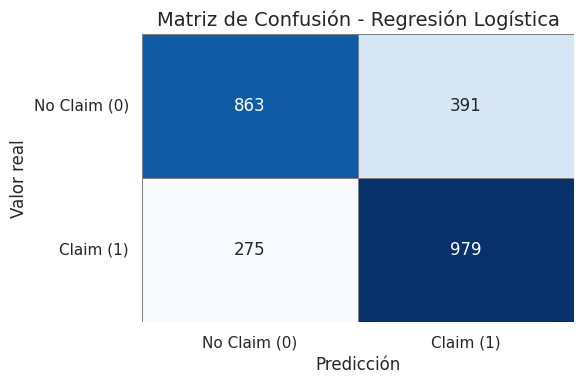

In [103]:
# Calcular matriz de confusión
cm = confusion_matrix(Y_test, predicciones)

# Crear el heatmap con mejor formato
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title('Matriz de Confusión - Regresión Logística', fontsize=14)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor real', fontsize=12)
plt.xticks([0.5, 1.5], ['No Claim (0)', 'Claim (1)'])
plt.yticks([0.5, 1.5], ['No Claim (0)', 'Claim (1)'], rotation=0)
plt.tight_layout()
plt.show()

Verdaderos Negativos (TN): 863 — Casos negativos correctamente clasificados.

Falsos Positivos (FP): 391 — Casos negativos clasificados incorrectamente como positivos.

Falsos Negativos (FN): 275 — Casos positivos clasificados como negativos.

Verdaderos Positivos (TP): 979 — Casos positivos correctamente clasificados.

Esto significa que:

El modelo tiene una buena capacidad para detectar casos positivos (979).

Sin embargo, comete un número considerable de falsos positivos (391), lo cual podría ser importante si el costo de una falsa alarma es alto.

In [104]:
# accuracy score of the model
print('Test accuracy = ', accuracy_score(Y_test, predicciones))

Test accuracy =  0.7344497607655502


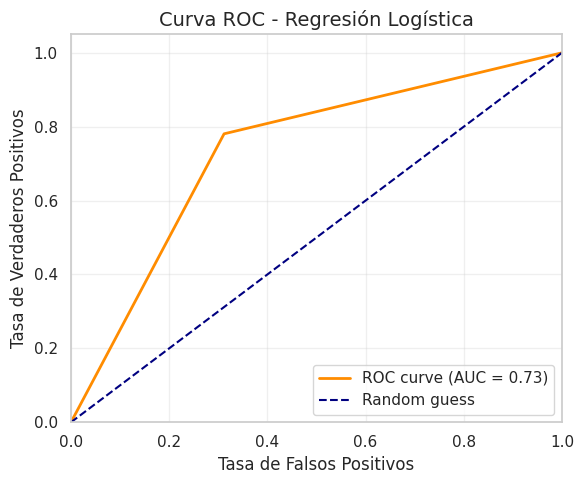

In [105]:
# Curva ROC
fpr_lr, tpr_lr, _ = roc_curve(Y_test, predicciones)
roc_auc = roc_auc_score(Y_test, predicciones)

# Gráfico
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.title('Curva ROC - Regresión Logística', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



---
# **Machine Learning Models**
---

In [106]:
X = df_entrenamiento.loc[:, df_entrenamiento.columns != "CLAIM_FLAG"]
Y = df_entrenamiento["CLAIM_FLAG"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, stratify=Y, random_state=0)

In [107]:
X_train.shape

(6122, 20)

In [108]:
X_test.shape

(2041, 20)

In [109]:
Y_train.shape

(6122,)

In [110]:
Y_test.shape

(2041,)

In [111]:
#checar esto pues habiamos aplico una tecnica antes
# standardize numerical variables
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# resample
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, Y_train)

In [112]:
X_train

array([[ 5.54769893, -1.0641134 , -0.79268651, ..., -0.63596428,
        -0.37958559,  2.01171343],
       [-0.33537969,  0.39490166,  0.12018535, ..., -0.63596428,
         2.63445198, -0.49708869],
       [-0.33537969,  0.15173248,  2.85880093, ..., -0.63596428,
        -0.37958559, -0.49708869],
       ...,
       [-0.33537969, -1.0641134 , -0.33625058, ..., -0.63596428,
        -0.37958559, -0.49708869],
       [-0.33537969, -0.09143669, -0.79268651, ..., -0.63596428,
        -0.37958559,  2.01171343],
       [-0.33537969, -1.0641134 , -0.33625058, ...,  1.57241536,
        -0.37958559, -0.49708869]])

In [113]:
X_train_rus

array([[-0.33537969, -0.33460587,  0.57662128, ..., -0.63596428,
        -0.37958559, -0.49708869],
       [-0.33537969, -1.0641134 , -0.79268651, ..., -0.63596428,
        -0.37958559, -0.49708869],
       [-0.33537969, -0.57777505, -0.79268651, ...,  1.57241536,
        -0.37958559, -0.49708869],
       ...,
       [-0.33537969, -0.09143669,  1.03305721, ..., -0.63596428,
        -0.37958559, -0.49708869],
       [-0.33537969, -1.0641134 , -0.79268651, ...,  1.57241536,
        -0.37958559, -0.49708869],
       [-0.33537969, -1.0641134 , -0.33625058, ...,  1.57241536,
        -0.37958559, -0.49708869]])

In [114]:
# define the function val_model
def val_model(X, y, clf, show=True):
    """
    Apply cross-validation on the training set.

    # Arguments
        X: DataFrame containing the independent variables.
        y: Series containing the target vector.
        clf: Scikit-learn estimator instance.

    # Returns
        float, mean value of the cross-validation scores.
    """

    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if show == True:
        print(f'Recall: {scores.mean()}, {scores.std()}')

    return scores.mean()

In [115]:
#evaluate the models
xgb = XGBClassifier()
lgb = LGBMClassifier()
cb = CatBoostClassifier()

model = []
recall = []

for clf in (xgb, lgb, cb):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, show=False))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1314, number of negative: 1313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 2627, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500190 -> initscore=0.000761
[LightGBM] [Info] Start training from score 0.000761
[LightGBM] [Info] Number of positive: 1314, number of negative: 1313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 2627, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Se han truncado las últimas 5000 líneas del flujo de salida.
4:	learn: 0.6768172	total: 53.4ms	remaining: 10.6s
5:	learn: 0.6739815	total: 54.6ms	remaining: 9.04s
6:	learn: 0.6713433	total: 55.8ms	remaining: 7.91s
7:	learn: 0.6684273	total: 57ms	remaining: 7.06s
8:	learn: 0.6659247	total: 58.2ms	remaining: 6.41s
9:	learn: 0.6631726	total: 59.3ms	remaining: 5.87s
10:	learn: 0.6607163	total: 60.5ms	remaining: 5.44s
11:	learn: 0.6579649	total: 61.8ms	remaining: 5.09s
12:	learn: 0.6552187	total: 63ms	remaining: 4.78s
13:	learn: 0.6529692	total: 64.2ms	remaining: 4.52s
14:	learn: 0.6501890	total: 65.4ms	remaining: 4.3s
15:	learn: 0.6479540	total: 66.7ms	remaining: 4.1s
16:	learn: 0.6453351	total: 68ms	remaining: 3.93s
17:	learn: 0.6434793	total: 69ms	remaining: 3.76s
18:	learn: 0.6414438	total: 70.2ms	remaining: 3.63s
19:	learn: 0.6396483	total: 71.4ms	remaining: 3.5s
20:	learn: 0.6375729	total: 72.5ms	remaining: 3.38s
21:	learn: 0.6353260	total: 73.7ms	remaining: 3.28s
22:	learn: 0.6333258

Recall
XGBClassifier       0.691204
LGBMClassifier      0.729578
CatBoostClassifier  0.737488

In [116]:
model

['XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']

In [117]:
ml_output=pd.DataFrame(data=recall, index=model, columns=['Recall'])
ml_output

Recall
XGBClassifier       0.691204
LGBMClassifier      0.729578
CatBoostClassifier  0.737488

En términos de recall, el modelo que obtuvo el mejor desempeño fue el CatBoostClassifier con un valor de 0.737, seguido por el LGBMClassifier con 0.730, y finalmente el XGBClassifier con 0.691. Esto indica que el modelo CatBoost fue el más eficaz para identificar correctamente los casos positivos, lo cual es especialmente relevante en contextos donde minimizar los falsos negativos es prioritario.

---
## **XGBoost**
---

In [118]:
# XGBoost
xgb = XGBClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,10)}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.730833299972867 for {'n_estimators': 10}


In [119]:
# XGBoost
xgb = XGBClassifier(n_estimators=10)

# parameter to be searched
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_child_weight': [1, 3, 4, 5, 6]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.7497231081279442 for {'max_depth': 3, 'min_child_weight': 5}


In [120]:
# XGBoost
xgb = XGBClassifier(n_estimators=10, max_depth=3, min_child_weight=5)

# parameter to be searched
param_grid = {'gamma': [0, 1, 3, 5, 7, 9, 11, 13]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.7600826449957077 for {'gamma': 0}


In [121]:
# XGBoost
xgb = XGBClassifier(n_estimators=10, max_depth=3, min_child_weight=5, gamma=7)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.0005, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.9098622435136132 for {'learning_rate': 0.01}


---
## **LightGBM**
---

In [122]:
# LightGBM
lbg = LGBMClassifier(silent=False)

# parameter to be searched
param_grid = {"max_depth": np.arange(5, 75, 10),
              "learning_rate" : [0.001, 0.01, 0.1],
              "num_leaves": np.arange(20, 220, 50),
             }

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 1642, number of negative: 1642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best result: 0.7606330926931681 for {'learning_rate': 0.01, 'max_depth': np.int64(15), 'num_leaves': np.int64(20)}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [123]:
lbg = LGBMClassifier(learning_rate=0.01, max_depth=5, num_leaves=20, silent=False)

# parameter to be searched
param_grid = {'min_data_in_leaf': np.arange(100, 1000, 100)}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Number of positive: 1642, number of negative: 1642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


---
## **CatBoost**
---

In [124]:
# CatBoost
cb = CatBoostClassifier()

# parameter to be searched
param_grid = {'depth': [6],
              'learning_rate': [0.1,0.3, 0.5],
              'scale_pos_weight': [3,4,5],
              'n_estimators': [1,5,10],
             }

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(cb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

0:	learn: 0.6374914	total: 1.94ms	remaining: 7.75ms
1:	learn: 0.5903119	total: 3.38ms	remaining: 5.08ms
2:	learn: 0.5559905	total: 4.99ms	remaining: 3.33ms
3:	learn: 0.5230123	total: 6.43ms	remaining: 1.61ms
4:	learn: 0.4933677	total: 7.92ms	remaining: 0us
Best result: 1.0 for {'depth': 6, 'learning_rate': 0.1, 'n_estimators': 5, 'scale_pos_weight': 5}


Reporte de Clasificación - XGBoost
              precision    recall  f1-score   support

         0.0       0.91      0.40      0.56      1494
         1.0       0.35      0.89      0.51       547

    accuracy                           0.53      2041
   macro avg       0.63      0.65      0.53      2041
weighted avg       0.76      0.53      0.55      2041



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:08:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


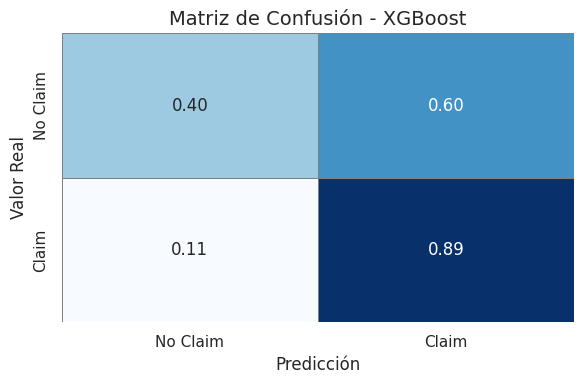

In [125]:
# Modelo XGBoost
xgb = XGBClassifier(max_depth=3, learning_rate=0.0005, n_estimators=10, gamma=7, min_child_weight=5, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_rus, y_train_rus)

# Predicción
X_test_xgb = scaler.transform(X_test)
y_pred_xgb = xgb.predict(X_test_xgb)

# Reporte de clasificación
print("Reporte de Clasificación - XGBoost")
print(classification_report(Y_test, y_pred_xgb))

# Matriz de confusión
cm = confusion_matrix(Y_test, y_pred_xgb, normalize='true')
labels = ['No Claim', 'Claim']

# Gráfico formateado
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor='gray')

plt.title('Matriz de Confusión - XGBoost', fontsize=14)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.tight_layout()
plt.show()

El modelo XGBoost muestra una alta precisión (0.91) en la clase 0 (no reclamaciones), pero un recall bajo (0.40) para esa misma clase, lo que indica que aunque predice bien los negativos cuando los identifica, está perdiendo muchos casos reales de la clase 0. Por otro lado, para la clase 1 (reclamaciones), el modelo tiene un recall alto (0.89), es decir, detecta la mayoría de los casos positivos, aunque la precisión es baja (0.35), lo que significa que genera bastantes falsos positivos. En conjunto, la exactitud general es moderada (53%), y la media ponderada del F1-score es de 0.55, lo que sugiere que el modelo tiene un desempeño equilibrado pero limitado para este problema. Estos resultados podrían mejorarse ajustando hiperparámetros o aplicando técnicas para balancear las clases y reducir falsos positivos.



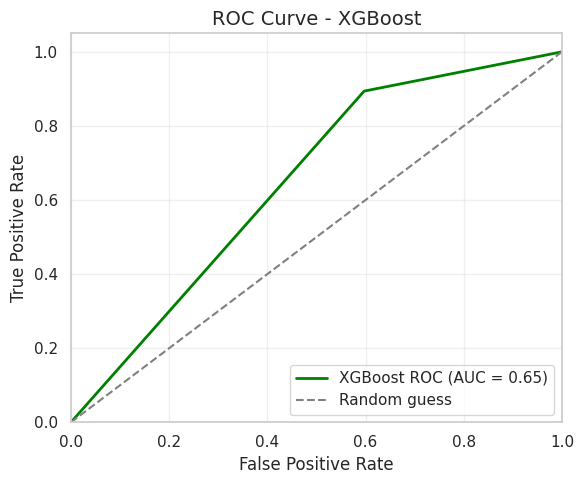

In [126]:
# Calcular curva ROC y AUC
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(Y_test, y_pred_xgb)

# Gráfico mejorado
plt.figure(figsize=(6, 5))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost ROC (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - XGBoost', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Number of positive: 1642, number of negative: 1642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


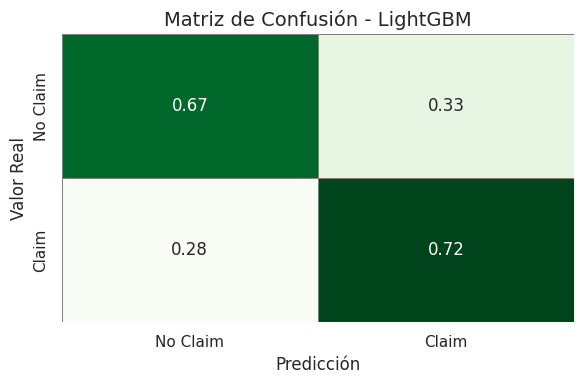

In [127]:
# Modelo LightGBM
lgb = LGBMClassifier(num_leaves=20, max_depth=5, learning_rate=0.01, min_data_in_leaf=100)
lgb.fit(X_train_rus, y_train_rus)

# Predicción
X_test_lgb = scaler.transform(X_test)
y_pred_lgb = lgb.predict(X_test_lgb)

# Reporte de clasificación
print("Reporte de Clasificación - LightGBM")
print(classification_report(Y_test, y_pred_lgb))

# Matriz de confusión normalizada
cm = confusion_matrix(Y_test, y_pred_lgb, normalize='true')
labels = ['No Claim', 'Claim']

# Gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Greens', cbar=False,
            xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor='gray')

plt.title('Matriz de Confusión - LightGBM', fontsize=14)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.tight_layout()
plt.show()

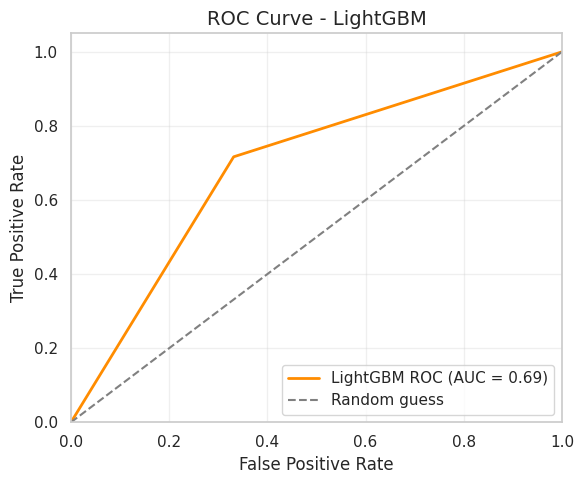

In [128]:
# Calcular curva ROC y AUC
fpr_lgb, tpr_lgb, _ = roc_curve(Y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(Y_test, y_pred_lgb)

# Gráfico mejorado
plt.figure(figsize=(6, 5))
plt.plot(fpr_lgb, tpr_lgb, color='darkorange', lw=2, label=f'LightGBM ROC (AUC = {roc_auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - LightGBM', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Reporte de Clasificación - CatBoost
              precision    recall  f1-score   support

         0.0       0.97      0.04      0.07      1494
         1.0       0.28      1.00      0.43       547

    accuracy                           0.30      2041
   macro avg       0.62      0.52      0.25      2041
weighted avg       0.78      0.30      0.17      2041



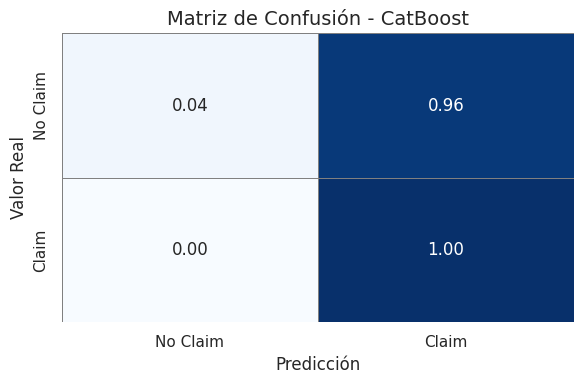

In [129]:
# Modelo CatBoost
cb = CatBoostClassifier(learning_rate=0.1, depth=6, scale_pos_weight=5, n_estimators=10, logging_level='Silent')
cb.fit(X_train_rus, y_train_rus)

# Predicción
X_test_cb = scaler.transform(X_test)
y_pred_cb = cb.predict(X_test_cb)

# Reporte de clasificación
print("Reporte de Clasificación - CatBoost")
print(classification_report(Y_test, y_pred_cb))

# Matriz de confusión normalizada
cm = confusion_matrix(Y_test, y_pred_cb, normalize='true')
labels = ['No Claim', 'Claim']

# Gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor='gray')

plt.title('Matriz de Confusión - CatBoost', fontsize=14)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.tight_layout()
plt.show()

El reporte de clasificación del modelo CatBoost revela un desempeño muy desbalanceado entre las dos clases. Mientras que para la clase 0 (No Claim) la precisión es alta (0.97), su recall es extremadamente bajo (0.04), lo que indica que el modelo casi no detecta correctamente los casos de la clase 0. Por otro lado, para la clase 1 (Claim), el recall es perfecto (1.00), es decir, todos los casos positivos fueron identificados, pero con una precisión baja (0.28), lo que indica muchas falsas alarmas. En conjunto, la exactitud global del modelo es baja (30%), reflejando que el modelo tiende a predecir en exceso la clase 1 a costa de perder muchos ejemplos de la clase 0. Esto puede ser síntoma de un problema de desbalance en los datos o de la necesidad de ajustar hiperparámetros o técnicas de muestreo para mejorar el equilibrio entre precisión y recall en ambas clases.

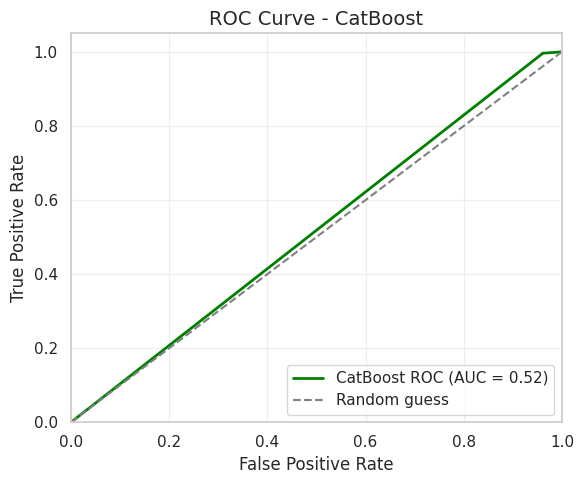

In [130]:
fpr_cb, tpr_cb, _ = roc_curve(Y_test, y_pred_cb)
roc_auc_cb = roc_auc_score(Y_test, y_pred_cb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_cb, tpr_cb, color='green', lw=2, label=f'CatBoost ROC (AUC = {roc_auc_cb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - CatBoost', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Reporte de Clasificación - Regresión Logística
              precision    recall  f1-score   support

         0.0       0.87      0.70      0.78      1494
         1.0       0.47      0.72      0.57       547

    accuracy                           0.70      2041
   macro avg       0.67      0.71      0.67      2041
weighted avg       0.76      0.70      0.72      2041



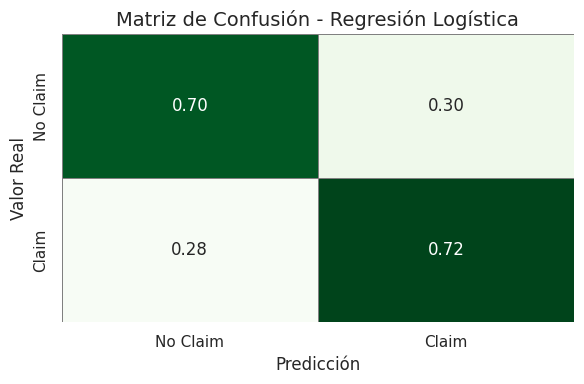

In [131]:
# Modelo de Regresión Logística
lr = LogisticRegression()
lr.fit(X_train_rus, y_train_rus)

# Predicción
X_test_lr = scaler.transform(X_test)
y_pred_lr = lr.predict(X_test_lr)

# Reporte de Clasificación
print("Reporte de Clasificación - Regresión Logística")
print(classification_report(Y_test, y_pred_lr))

# Matriz de Confusión Normalizada
cm = confusion_matrix(Y_test, y_pred_lr, normalize='true')
labels = ['No Claim', 'Claim']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Greens', cbar=False,
            xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor='gray')

plt.title('Matriz de Confusión - Regresión Logística', fontsize=14)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.tight_layout()
plt.show()

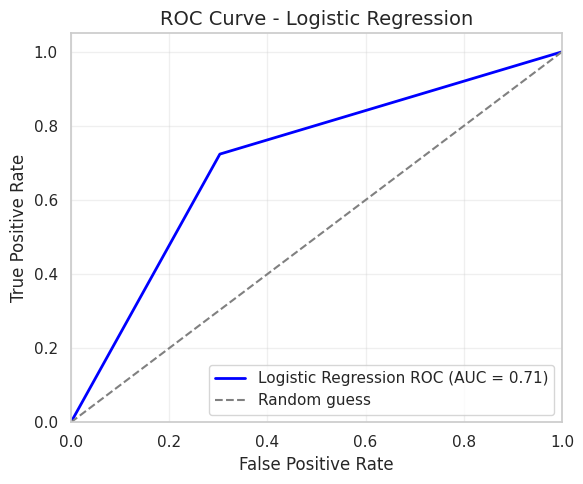

In [132]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(Y_test, y_pred_lr)

plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression ROC (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

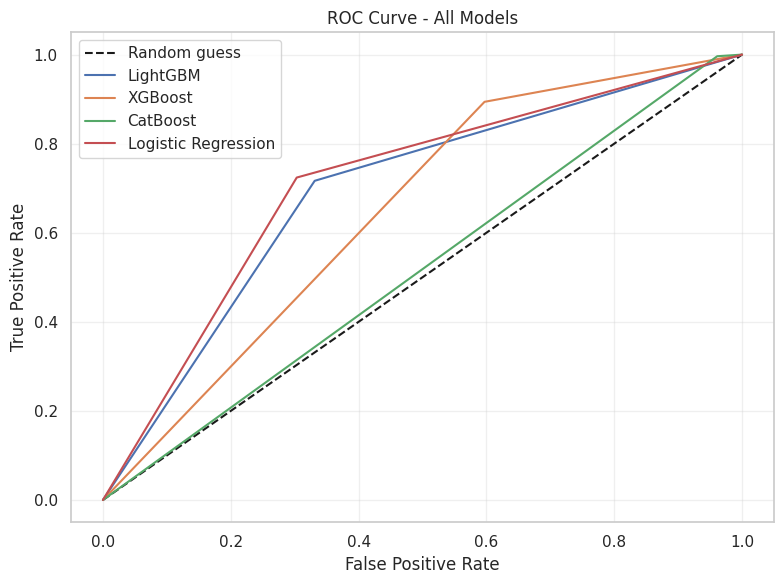

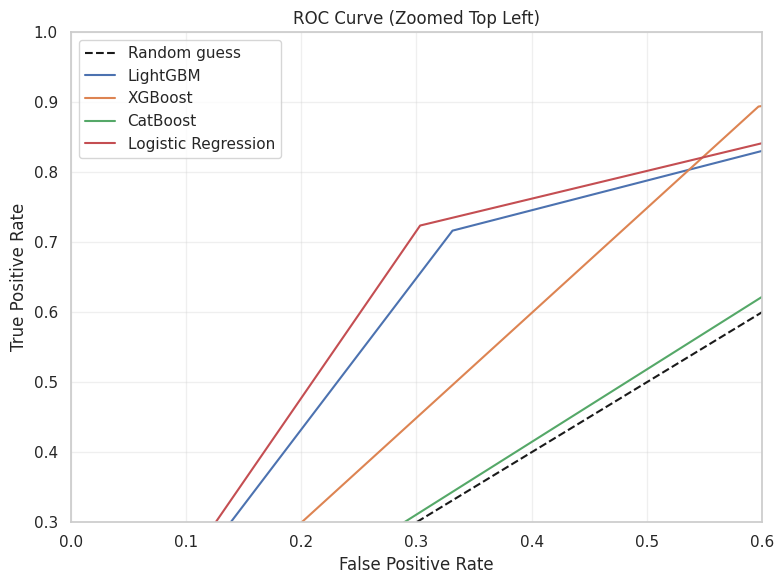

In [133]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_cb, tpr_cb, label='CatBoost')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All Models')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.xlim(0, 0.6)
plt.ylim(0.3, 1.0)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_cb, tpr_cb, label='CatBoost')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Zoomed Top Left)')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


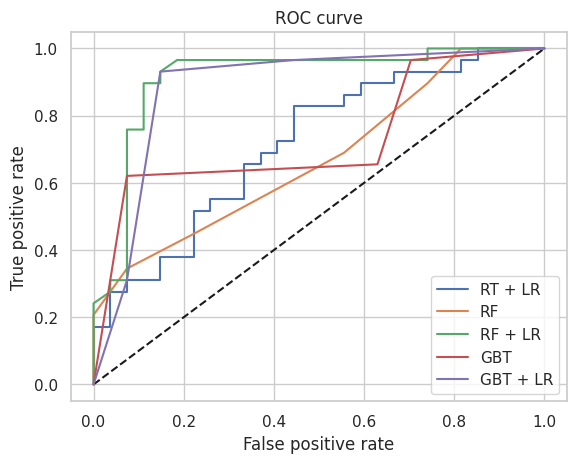

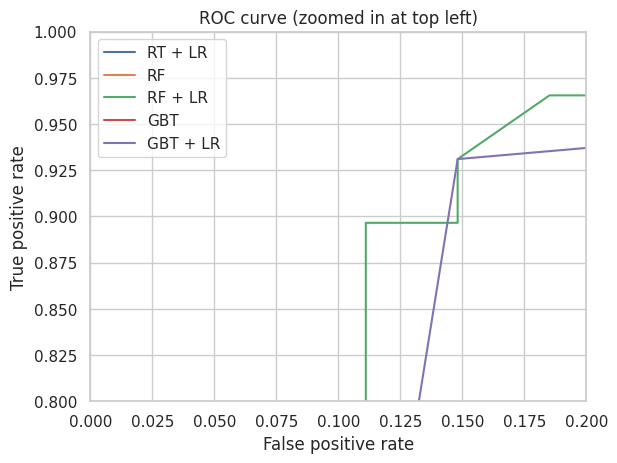

In [134]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
X, Y = make_classification(n_samples=80)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7)

# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, Y_train, Y_train_lr = train_test_split(
    X_train, Y_train, test_size=0.7)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
                          random_state=0)

rt_lm = LogisticRegression(max_iter=1000)
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, Y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(Y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression(max_iter=1000)
rf.fit(X_train, Y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), Y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(Y_test, y_pred_rf_lm)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression(max_iter=1000)
grd.fit(X_train, Y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), Y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(Y_test, y_pred_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
y_pred_grd2 = grd.predict(X_test)
fpr_grd, tpr_grd, _ = roc_curve(Y_test, y_pred_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf2 = grd.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

              precision    recall  f1-score   support

           0       0.50      0.37      0.43        27
           1       0.53      0.66      0.58        29

    accuracy                           0.52        56
   macro avg       0.51      0.51      0.51        56
weighted avg       0.51      0.52      0.51        56



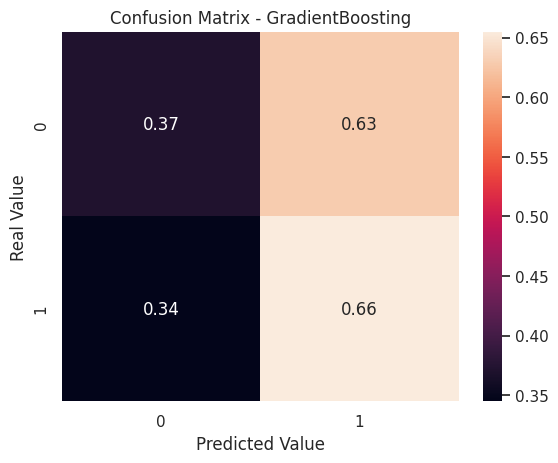

In [135]:
# classification report
print(classification_report(Y_test, y_pred_rf2))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, y_pred_rf2, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - GradientBoosting')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

In [136]:
Y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [137]:
y_pred_grd2

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])